<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Data and Kaggle Challenge

## 01 Exploratory Data Analysis (EDA) & Data Cleaning

> SG-DSI-41 Group 01: Daryl Chia, Germaine Choo, Lionel Foo

---

## 01. Import Libraries

In [4]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 02. Load & Check Data

### 02.01 Load Data

In [5]:
# Load data:
hdb = pd.read_csv('./data/train.csv')

# Display all data columns:
pd.set_option('display.max_columns', None)

# Check data:
print(hdb.shape)
hdb.head()

(150634, 77)


/var/folders/fy/92rm3rl955997y4_8yf6zth00000gn/T/ipykernel_82046/2456046915.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb = pd.read_csv('./data/train.csv')


id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  hdb_age  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760       15   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320       34   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016       24   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692       29   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412       34   

   max_floor_lvl  year_completed residential commercial market_hawker  \
0             25            2005           Y          N             N   
1              9            1987           Y          N             N   
2             16            1996           Y          N             N   
3             11            1990           Y          Y             N   
4              4            1987           Y          N             N   

  multistorey_carpark precinct_pavilion  total_dwelling_units  1room_sold  \
0                   N                 N                   142           0   
1                   N                 N                   112           0   
2                   N                 N                    90           0   
3                   N                 N                    75           0   
4                   N                 N                    48           0   

   2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  multigen_sold  \
0           0           0          96          46          0              0   
1           0           0          56          56          0              0   
2           0           0           0          30         60              0   
3           0           0          68           7          0              0   
4           0           0          30          18          0              0   

   studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
0                      0             0             0             0   
1                      0             0             0             0   
2                      0             0             0             0   
3                      0             0             0             0   
4                      0             0             0             0   

   other_room_rental  postal  Latitude   Longitude planning_area  \
0                  0  382003  1.314299  103.872828       Kallang   
1                  0  570153  1.346086  103.855078        Bishan   
2                  0  651289  1.343867  103.760535   Bukit Batok   
3                  0  570232  1.358245  103.845504        Bishan   
4                  0  760876  1.414745  103.835532        Yishun   

   Mall_Neares

### 02.02 Data Dictionary

<details><summary> Show details: </summary>

> | **No.** | **Column** | **Description** | **Type** | **Feature Group** |
> |---|---|---|---|---|
> | 1 | `id` | Index number | id | - |
> | 2 | `resale_price` | Property's sale price in Singapore dollars. | Target Variable | - |
> | 3 | `Tranc_year` | Year of resale transaction. | Feature | Transaction |
> | 4 | `Tranc_month` | Month of resale transaction. | Feature | Transaction |
> | 5 | `Tranc_yearmonth` | Year and month of the resale transaction. | Feature | Transaction |
> | 6 | `year_completed` | Year which construction was completed for resale flat. | Feature | Transaction |
> | 7 | `lease_commence_date` | Commencement year of the flat unit's 99-year lease. | Feature | Transaction |
> | 8 | `hdb_age` | Number of years from lease_commence_date to 2021. | Feature | Transaction |
> | 9 | `planning_area` | Government planning area that the flat is located. | Feature | Location |
> | 10 | `town` | HDB township where the flat is located. | Feature | Location |
> | 11 | `street_name` | Street name where the resale flat resides. | Feature | Location |
> | 12 | `block` | Block number of the resale flat. | Feature | Location |
> | 13 | `address` | Combination of `block` and `street_name`. | Feature | Location |
> | 14 | `postal` | Postal code of the resale flat block. | Feature | Location |
> | 15 | `Latitude` | Latitude based on postal code. | Feature | Location |
> | 16 | `Longitude` | Longitude based on postal code. | Feature | Location |
> | 17 | `residential` | Boolean value if resale flat has residential units in the same block. | Feature | Block |
> | 18 | `commercial` | Boolean value if resale flat has commercial units in the same block. | Feature | Block |
> | 19 | `market_hawker` | Boolean value if resale flat has a market or hawker centre in the same block. | Feature | Block |
> | 20 | `multistorey_carpark` | Boolean value if resale flat has a multistorey carpark in the same block. | Feature | Block |
> | 21 | `precinct_pavilion` | Boolean value if resale flat has a pavilion in the same block. | Feature | Block |
> | 22 | `max_floor_lvl` | Highest floor of the resale flat. | Feature | Block |
> | 23 | `total_dwelling_units` | Total number of residential dwelling units in the resale flat. | Feature | Block |
> | 24 | `1room_sold` | Number of 1-room residential units in the resale flat. | Feature | Block |
> | 25 | `2room_sold` | Number of 2-room residential units in the resale flat. | Feature | Block |
> | 26 | `3room_sold` | Number of 3-room residential units in the resale flat. | Feature | Block |
> | 27 | `4room_sold` | Number of 4-room residential units in the resale flat. | Feature | Block |
> | 28 | `5room_sold` | Number of 5-room residential units in the resale flat. | Feature | Block |
> | 29 | `exec_sold` | Number of executive type residential units in the resale flat block. | Feature | Block |
> | 30 | `multigen_sold` | Number of multi-generational type residential units in the resale flat block. | Feature | Block |
> | 31 | `studio_apartment_sold` | Number of studio apartment type residential units in the resale flat block. | Feature | Block |
> | 32 | `1room_rental` | Number of 1-room rental residential units in the resale flat block. | Feature | Block |
> | 33 | `2room_rental` | Number of 2-room rental residential units in the resale flat block. | Feature | Block |
> | 34 | `3room_rental` | Number of 3-room rental residential units in the resale flat block. | Feature | Block |
> | 35 | `other_room_rental` | Number of "other" type rental residential units in the resale flat block. | Feature | Block |
> | 36 | `flat_type` | Type of the resale flat unit. | Feature | Flat |
> | 37 | `flat_model` | HDB model of the resale flat, e.g. Multi Generation. | Feature | Flat |
> | 38 | `full_flat_type` | Combination of `flat_type` and `flat_model`. | Feature | Flat |
> | 39 | `storey_range` | Floor level (range) of the resale flat unit. | Feature | Flat |
> | 40 | `lower` | Lower value of `storey_range`. | Feature | Flat |
> | 41 | `mid` | Middle value of `storey_range`. | Feature | Flat |
> | 42 | `upper` | Upper value of `storey_range`. | Feature | Flat |
> | 43 | `mid_storey` | Median value of `storey_range`. | Feature | Flat |
> | 44 | `floor_area_sqm` | Floor area of the resale flat unit in square metres. | Feature | Flat |
> | 45 | `floor_area_sqft` | Floor area of the resale flat unit in square feet. | Feature | Flat |
> | 46 | `bus_stop_name` | Name of the nearest bus stop. | Feature | Public Transport |
> | 47 | `bus_interchange` | Boolean value if the nearest MRT station is also a bus interchange. | Feature | Public Transport |
> | 48 | `bus_stop_nearest_distance` |  Distance (in metres) to the nearest bus stop. | Feature | Public Transport |
> | 49 | `bus_stop_latitude` | Latitude (in decimal degrees) of the the nearest bus stop. | Feature | Public Transport |
> | 50 | `bus_stop_longitude` | Longitude (in decimal degrees) of the nearest bus stop. | Feature | Public Transport |
> | 51 | `mrt_name` | Name of the nearest MRT station. | Feature | Public Transport |
> | 52 | `mrt_interchange` | Boolean value if the nearest MRT station is a train interchange station. | Feature | Public Transport |
> | 53 | `mrt_nearest_distance`| Distance (in metres) to the nearest MRT station. | Feature | Public Transport |
> | 54 | `mrt_latitude` | Latitude (in decimal degrees) of the the nearest MRT station. | Feature | Public Transport |
> | 55 | `mrt_longitude` | Longitude (in decimal degrees) of the nearest MRT station. | Feature | Public Transport |
> | 56 | `Mall_nearest_distance.` | Distance (in metres) to the nearest mall. | Feature | Mall |
> | 57 | `Mall_within_500m` | Number of malls within 500 metres. | Feature | Mall |
> | 58 | `Mall_within_1km` | Number of malls within 1 kilometre. | Feature | Mall |
> | 59 | `Mall_within_2km` | Number of malls within 2 kilometres. | Feature | Mall |
> | 60 | `hawker_food_stalls` | Number of hawker food stalls in the nearest hawker centre. | Feature | Hawker Centre |
> | 61 | `hawker_market_stalls` | Number of hawker and market stalls in the nearest hawker centre. | Feature | Hawker Centre |
> | 62 | `Hawker_nearest_distance` | Distance (in metres) to the nearest hawker centre. | Feature | Hawker Centre |
> | 63 | `Hawker_within_500m` | Number of hawker centres within 500 metres. | Feature | Hawker Centre |
> | 64 | `Hawker_within_1km` | Number of hawker centres within 1 kilometre. | Feature | Hawker Centre |
> | 65 | `Hawker_within_2km` | Number of hawker centres within 2 kilometres. | Feature | Hawker Centre |
> | 66 | `pri_sch_name` | Name of the nearest primary school. | Feature | School |
> | 67 | `vacancy` | Number of vacancies in the nearest primary school. | Feature | School |
> | 68 | `pri_sch_affiliation` | Boolean value if the nearest primary school has a secondary school affiliation. | Feature | School |
> | 69 | `pri_sch_nearest_distance` | Distance (in metres) to the nearest primary school. | Feature | School |
> | 70 | `pri_sch_latitude` | Latitude (in decimal degrees) of the the nearest primary school. | Feature | School |
> | 71 | `pri_sch_longitude` | Longitude (in decimal degrees) of the nearest primary school. | Feature | School |
> | 72 | `sec_sch_name` | Name of the nearest secondary school. | Feature | School |
> | 73 | `cutoff_point` | PSLE cutoff point of the nearest secondary school. | Feature | School |
> | 74 | `affiliation` | Boolean value if the nearest secondary school has a primary school affiliation. | Feature | School |
> | 75 | `sec_sch_nearest_dist` | Distance (in metres) to the nearest secondary school. | Feature | School |
> | 76 | `sec_sch_latitude` | Latitude (in decimal degrees) of the the nearest secondary school. | Feature | School |
> | 77 | `sec_sch_longitude` | Longitude (in decimal degrees) of the nearest secondary school . | Feature | School |

</details>

### 02.03 Check Data Information & Summary Statistics

In [6]:
# Check data info:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [7]:
# Summarise data:
hdb.describe(include='all')

id Tranc_YearMonth         town flat_type   block  \
count   150634.000000          150634       150634    150634  150634   
unique            NaN             110           26         7    2514   
top               NaN         2018-07  JURONG WEST    4 ROOM       2   
freq              NaN            2088        11451     61136     579   
mean     93047.887496             NaN          NaN       NaN     NaN   
std      53679.906247             NaN          NaN       NaN     NaN   
min          1.000000             NaN          NaN       NaN     NaN   
25%      46469.250000             NaN          NaN       NaN     NaN   
50%      93077.500000             NaN          NaN       NaN     NaN   
75%     139574.750000             NaN          NaN       NaN     NaN   
max     185966.000000             NaN          NaN       NaN     NaN   

           street_name storey_range  floor_area_sqm flat_model  \
count           150634       150634    150634.00000     150634   
unique             553           25             NaN         20   
top     YISHUN RING RD     04 TO 06             NaN    Model A   
freq              2451        34699             NaN      46261   
mean               NaN          NaN        97.19763        NaN   
std                NaN          NaN        24.40304        NaN   
min                NaN          NaN        31.00000        NaN   
25%                NaN          NaN        75.00000        NaN   
50%                NaN          NaN        95.00000        NaN   
75%                NaN          NaN       112.00000        NaN   
max                NaN          NaN       280.00000        NaN   

        lease_commence_date  resale_price     Tranc_Year    Tranc_Month  \
count         150634.000000  1.506340e+05  150634.000000  150634.000000   
unique                  NaN           NaN            NaN            NaN   
top                     NaN           NaN            NaN            NaN   
freq                    NaN           NaN            NaN            NaN   
mean            1992.448464  4.491615e+05    2016.489551       6.580500   
std               12.138829  1.433076e+05       2.752396       3.345468   
min             1966.000000  1.500000e+05    2012.000000       1.000000   
25%             1984.000000  3.470000e+05    2014.000000       4.000000   
50%             1992.000000  4.200000e+05    2017.000000       7.000000   
75%             2001.000000  5.200000e+05    2019.000000       9.000000   
max             2019.000000  1.258000e+06    2021.000000      12.000000   

           mid_storey          lower          upper            mid  \
count   150634.000000  150634.000000  150634.000000  150634.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         8.284823       7.248370       9.321275       8.284823   
std          5.508074       5.515155       5.507364       5.508074   
min          2.000000       1.000000       3.000000       2.000000   
25%          5.000000       4.000000       6.000000       5.000000   
50%          8.000000       7.000000       9.000000       8.000000   
75%         11.000000      10.000000      12.000000      11.000000   
max         50.000000      49.000000      51.000000      50.000000   

        full_flat_type              address  floor_area_sqft        hdb_age  \
count           150634               150634    150634.000000  150634.000000   
unique              43                 9157              NaN            NaN   
top     4 ROOM Model A  91, TANGLIN HALT RD              NaN            NaN   
freq             35127                  106              NaN            NaN   
mean               NaN                  NaN      1046.235290      28.551536   
std                NaN                  NaN       262.674321      12.138829   
min                NaN                  NaN       333.684000      

### 02.03 Observation(s) & Finding(s)

<details><summary> Show details: </summary>

> - These column names should be in lowercase:
>   - `Tranc_YearMonth`
>   - `Tranc_Year`
>   - `Tranc_Month`
>   - `Latitude`
>   - `Longitude`
>   - `Mall_Nearest_Distance`
>   - `Mall_Within_500m`
>   - `Mall_Within_1km`
>   - `Mall_Within_2km`
>   - `Hawker_Nearest_Distance`
>   - `Hawker_Within_500m`
>   - `Hawker_Within_1km`
>   - `Hawker_Within_2km`
> - These columns have data with binary categories, which should be represented as boolean (bool) or integer (int) values:
>   - `residential`
>   - `commercial`
>   - `market_hawker`
>   - `multistorey_carpark`
>   - `precinct_pavilion`
> - All other columns have the appropriate data type.
> - These columns are not of the datetime format and data type:
>   - `Tranc_Year`
>   - `Tranc_Month`
>   - `Tranc_YearMonth`
>   - `year_completed`
>   - `lease_commence_date`

> **Follow-Up Actions**
> 1. **Convert** relevant column names to lowercase.
> 2. **Represent** data in relevant columns with binary categories as integer values.

</details>

### 02.04 Check Data for Null Values

In [8]:
# Display all rows:
pd.set_option('display.max_rows', None)

# Check data for null values:
hdb.isnull().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units

In [9]:
# Reset option to display all rows:
pd.reset_option('display.max_rows')

In [10]:
# Check sanity of null values in column 'Mall_Nearest_Distance':

# Count rows where columns 'Mall_Within_500m', 'Mall_Within_1km', and 'Mall_Within_2km' each have null values:
print(hdb[hdb['Mall_Within_500m'].isnull() &
        hdb['Mall_Within_1km'].isnull() &
        hdb['Mall_Within_2km'].isnull()]['id'].count())

# Count rows where all mall feature columns have null values:
print(hdb[hdb['Mall_Nearest_Distance'].isnull() &
        hdb['Mall_Within_500m'].isnull() &
        hdb['Mall_Within_1km'].isnull() &
        hdb['Mall_Within_2km'].isnull()]['id'].count())

# Calculate proportion of null values in column 'Mall_Nearest_Distance':
print(829 / hdb['id'].count())

1940
829
0.005503405605640161


In [11]:
# Check sanity of null values in mall columns 'Mall_Within_500m', 'Mall_Within_1km', and 'Mall_Within_2km':

# Count rows where columns 'Mall_Within_500m' and 'Mall_Within_1km' each have null values:
print(hdb[hdb['Mall_Within_500m'].isnull() & hdb['Mall_Within_1km'].isnull()]['id'].count())

# Count rows where columns 'Mall_Within_500m', 'Mall_Within_1km', and 'Mall_Within_2km' each have null values:
print(hdb[hdb['Mall_Within_500m'].isnull() &
          hdb['Mall_Within_1km'].isnull() &
          hdb['Mall_Within_2km'].isnull()]['id'].count())

25426
1940


In [12]:
# Check sanity of null values in hawker centre columns 'Hawker_Within_500m', 'Hawker_Within_1km', and 'Hawker_Within_2km':

# Count rows where columns 'Hawker_Within_500m' and 'Hawker_Within_1km' each have null values:
print(hdb[hdb['Hawker_Within_500m'].isnull() & hdb['Hawker_Within_1km'].isnull()]['id'].count())

# Count rows where columns 'Hawker_Within_500m', 'Hawker_Within_1km', and 'Hawker_Within_2km' each have null values:
print(hdb[hdb['Hawker_Within_500m'].isnull() &
          hdb['Hawker_Within_1km'].isnull() &
          hdb['Hawker_Within_2km'].isnull()]['id'].count())

60868
29202


### 02.05 Check Column `hdb_age` for Time Frame Reference

In [13]:
# Check column 'hdb_age' for time frame reference:
(hdb['lease_commence_date'] + hdb['hdb_age']).value_counts()

2021    150634
Name: count, dtype: int64

### 02.04 - 02.05 Observation(s) & Finding(s)

<details><summary> Show details: </summary>

> - These columns contain null values:
>   - `Mall_Nearest_Distance`
>   - `Mall_Within_500m`
>   - `Mall_Within_1km`
>   - `Mall_Within_2km`
>   - `Hawker_Within_500m`
>   - `Hawker_Within_1km`
>   - `Hawker_Within_2km`
> - The null values in column `Mall_Nearest_Distance` are missing values since there should be a nearest mall even if column `Mall_Within_2km` contains a null value. Furthermore, the missing values do not generalize for all rows where column `Mall_Within_2km` contain a null value.
> - The rows where column `Mall_Nearest_Distance` has null values should be dropped since they make up only 0.55% of the dataset. There is no way to impute an estimated value based on columns `Mall_Within_500m`, `Mall_Within_1km`, `Mall_Within_2km` as they also contain null values.
> - The null values in columns `Mall_Within_500m`, `Mall_Within_1km`, `Mall_Within_2km` are sound since null values in column `Mall_Within_2km` correspond to null values in column `Mall_Within_1km`, and as such with column `Mall_Within_500m`.
> - The null values in columns `Mall_Within_500m`, `Mall_Within_1km`, `Mall_Within_2km` should be imputed with 0 for continuity with the other discrete values.
> - The null values in columns `Hawker_Within_500m`, `Hawker_Within_1km`, `Hawker_Within_2km` are sound since null values in column `Hawker_Within_2km` correspond to null values in column `Hawker_Within_1km`, and as such with column `Hawker_Within_500m`.
> - The null values in columns `Hawker_Within_500m`, `Hawker_Within_1km`, `Hawker_Within_2km` should be imputed with 0 for continuity with the other discrete values.

> - The column `hdb_age` has a time frame from lease commencement date (`lease_commence_date`) to 2021, which has no meaningful interpretation across years.

> **Follow-Up Actions**
> 1. **Drop** the rows where column `Mall_Nearest_Distance` has null values.
> 2. **Impute** the null values in the relevant columns with 0.
> 3. **Redefine** the column `hdb_age` as the time frame from lease commencement date (`lease_commence_date`) to transaction year (`Tranc_Year`).

</details>

## 03. Clean Data

### 03.01 Convert the Relevant Column Names to Lowercase

In [14]:
# Convert the relevant column names to lowercase:
hdb.columns = hdb.columns.str.lower()

### 03.02 Represent Data in the Relevant Columns with Binary Categories as Integer Values

In [15]:
# Represent data in the relevant columns with binary categories as integer values:
hdb['residential'] = hdb['residential'].map(lambda var: int(1) if var == 'Y' else int(0))
hdb['commercial'] = hdb['commercial'].map(lambda var: int(1) if var == 'Y' else int(0))
hdb['market_hawker'] = hdb['market_hawker'].map(lambda var: int(1) if var == 'Y' else int(0))
hdb['multistorey_carpark'] = hdb['multistorey_carpark'].map(lambda var: int(1) if var == 'Y' else int(0))
hdb['precinct_pavilion'] = hdb['precinct_pavilion'].map(lambda var: int(1) if var == 'Y' else int(0))

### 03.03 Drop the Rows where Column `mall_nearest_distance` has Null Values

In [16]:
# Drop the rows where column 'mall_nearest_distance' has null values:
hdb = hdb[hdb['mall_nearest_distance'].notnull()]

### 03.04. Impute Null Values in the Relevant Columns with 0

In [17]:
# Impute null values in the relevant columns with 0:
hdb['mall_within_500m'].fillna(0, inplace=True)
hdb['mall_within_1km'].fillna(0, inplace=True)
hdb['mall_within_2km'].fillna(0, inplace=True)
hdb['hawker_within_500m'].fillna(0, inplace=True)
hdb['hawker_within_1km'].fillna(0, inplace=True)
hdb['hawker_within_2km'].fillna(0, inplace=True)

### 03.05 Redefine the Column `hdb_age` as the Time Frame from Lease Commencement Date (`lease_commence_date`) to Transaction Year (`tranc_year`)

In [18]:
# Redefine the column 'hdb_age' as the time frame from 'lease_commence_date' to 'tranc_year':
hdb['hdb_age'] = hdb['tranc_year'] - hdb['lease_commence_date']

In [19]:
# Check data info:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149805 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149805 non-null  int64  
 1   tranc_yearmonth            149805 non-null  object 
 2   town                       149805 non-null  object 
 3   flat_type                  149805 non-null  object 
 4   block                      149805 non-null  object 
 5   street_name                149805 non-null  object 
 6   storey_range               149805 non-null  object 
 7   floor_area_sqm             149805 non-null  float64
 8   flat_model                 149805 non-null  object 
 9   lease_commence_date        149805 non-null  int64  
 10  resale_price               149805 non-null  float64
 11  tranc_year                 149805 non-null  int64  
 12  tranc_month                149805 non-null  int64  
 13  mid_storey                 149805 

In [20]:
# Summarise data:
hdb.describe()

id  floor_area_sqm  lease_commence_date  resale_price  \
count  149805.000000   149805.000000        149805.000000  1.498050e+05   
mean    92877.061073       97.228022          1992.316638  4.486621e+05   
std     53640.649122       24.438881            12.040577  1.432125e+05   
min         1.000000       31.000000          1966.000000  1.500000e+05   
25%     46253.000000       75.000000          1984.000000  3.460000e+05   
50%     92970.000000       95.000000          1990.000000  4.200000e+05   
75%    139211.000000      112.000000          2001.000000  5.200000e+05   
max    185966.000000      280.000000          2018.000000  1.258000e+06   

          tranc_year    tranc_month     mid_storey          lower  \
count  149805.000000  149805.000000  149805.000000  149805.000000   
mean     2016.466513       6.586756       8.263609       7.226955   
std         2.742246       3.339708       5.482182       5.489195   
min      2012.000000       1.000000       2.000000       1.000000   
25%      2014.000000       4.000000       5.000000       4.000000   
50%      2017.000000       7.000000       8.000000       7.000000   
75%      2019.000000       9.000000      11.000000      10.000000   
max      2021.000000      12.000000      50.000000      49.000000   

               upper            mid  floor_area_sqft        hdb_age  \
count  149805.000000  149805.000000    149805.000000  149805.000000   
mean        9.300264       8.263609      1046.562426      24.149875   
std         5.481607       5.482182       263.060119      11.824823   
min         3.000000       2.000000       333.684000       1.000000   
25%         6.000000       5.000000       807.300000      15.000000   
50%         9.000000       8.000000      1022.580000      25.000000   
75%        12.000000      11.000000      1205.568000      33.000000   
max        51.000000      50.000000      3013.920000      54.000000   

       max_floor_lvl  year_completed  residential     commercial  \
count  149805.000000   149805.000000     149805.0  149805.000000   
mean       15.107914     1990.789994          1.0       0.191930   
std         6.194526       12.102331          0.0       0.393819   
min         2.000000     1949.000000          1.0       0.000000   
25%        12.000000     1983.000000          1.0       0.000000   
50%        13.000000     1988.000000          1.0       0.000000   
75%        16.000000     1999.000000          1.0       0.000000   
max        50.000000     2017.000000          1.0       1.000000   

       market_hawker  multistorey_carpark  precinct_pavilion  \
count  149805.000000        149805.000000      149805.000000   
mean        0.000100             0.000280           0.000754   
std         0.010006             0.016742           0.027455   
min         0.000000             0.000000           0.000000   
25%         0.000000             0.000000           0.000000   
50%         0.000000             0.000000           0.000000   
75%         0.000000             0.000000           0.000000   
max         1.000000             1.000000           1.000000   

       total_dwelling_units     1room_sold     2room_sold     3room_sold  \
count         149805.000000  149805.000000  149805.000000  149805.000000   
mean             124.592070       0.139581       1.765615      39.277033   
std               58.309788       5.964397      11.685666      68.858414   
min                2.000000       0.000000       0.000000       0.000000   
25%               90.000000       0.000000       0.000000       0.000000   
50%              112.000000       0.000000       0.000000       0.000000   
75%              144.000000       0.000000       0.000000      66.000000   
max              570.000000     255.000000     225.000000     528.000000   

          4room_sold     5room_sold      exec_sold  multigen_sold  \
count  149805.000000  149805.000000  149805.000000  149805.000000   
mean       49.927406      26.304082       5.973486       0.024105  

In [21]:
# Display all rows:
pd.set_option('display.max_rows', None)

# Check data for null values:
hdb.isnull().sum()

id                           0
tranc_yearmonth              0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
resale_price                 0
tranc_year                   0
tranc_month                  0
mid_storey                   0
lower                        0
upper                        0
mid                          0
full_flat_type               0
address                      0
floor_area_sqft              0
hdb_age                      0
max_floor_lvl                0
year_completed               0
residential                  0
commercial                   0
market_hawker                0
multistorey_carpark          0
precinct_pavilion            0
total_dwelling_units         0
1room_sold                   0
2room_sold                   0
3room_sold                   0
4room_so

In [22]:
# Reset option to display all rows:
pd.reset_option('display.max_rows')

## 04. Organise & Evaluate Features

### 04.01 Organise Features

In [23]:
# Organise features into groups (lists):

# Target variable:
target_var = ['resale_price']

# Transaction & location features:
feat_txn_loc = ['tranc_year',
                'tranc_month',
                'tranc_yearmonth',
                'year_completed',
                'lease_commence_date',
                'hdb_age',
                'planning_area',
                'town',
                'street_name',
                'block',
                'address',
                'postal',
                'latitude',
                'longitude']

# Block features:
feat_block = ['residential',
              'commercial',
              'market_hawker',
              'multistorey_carpark',
              'precinct_pavilion',
              'max_floor_lvl',
              'total_dwelling_units',
              '1room_sold',
              '2room_sold',
              '3room_sold',
              '4room_sold',
              '5room_sold',
              'exec_sold',
              'multigen_sold',
              'studio_apartment_sold',
              '1room_rental',
              '2room_rental',
              '3room_rental',
              'other_room_rental']

# Flat features:
feat_flat = ['flat_type',
             'flat_model',
             'full_flat_type',
             'storey_range',
             'lower',
             'mid',
             'upper',
             'mid_storey',
             'floor_area_sqm',
             'floor_area_sqft']

# Public transport features:
feat_pub_transport = ['bus_stop_name',
                      'bus_interchange',
                      'bus_stop_nearest_distance',
                      'bus_stop_latitude',
                      'bus_stop_longitude',
                      'mrt_name',
                      'mrt_interchange',
                      'mrt_nearest_distance',
                      'mrt_latitude',
                      'mrt_longitude']

# Mall & hawker centre features:
feat_mall_hawker = ['mall_nearest_distance',
                    'mall_within_500m',
                    'mall_within_1km',
                    'mall_within_2km',
                    'hawker_food_stalls',
                    'hawker_market_stalls',
                    'hawker_nearest_distance',
                    'hawker_within_500m',
                    'hawker_within_1km',
                    'hawker_within_2km']

# School features:
feat_sch = ['pri_sch_name',
            'vacancy',
            'pri_sch_affiliation',
            'pri_sch_nearest_distance',
            'pri_sch_latitude',
            'pri_sch_longitude',
            'sec_sch_name',
            'cutoff_point',
            'affiliation',
            'sec_sch_nearest_dist',
            'sec_sch_latitude',
            'sec_sch_longitude']

# Count all columns:
len(feat_txn_loc + feat_block + feat_flat + feat_pub_transport + feat_mall_hawker + feat_sch + target_var)

76

### 04.02 Analyse **Transaction & Location** Features 

In [24]:
# Check data:
hdb[feat_txn_loc + target_var].head()

tranc_year  tranc_month tranc_yearmonth  year_completed  \
0        2016            5         2016-05            2005   
1        2012            7         2012-07            1987   
2        2013            7         2013-07            1996   
3        2012            4         2012-04            1990   
4        2017           12         2017-12            1987   

   lease_commence_date  hdb_age planning_area             town  \
0                 2006       10       Kallang  KALLANG/WHAMPOA   
1                 1987       25        Bishan           BISHAN   
2                 1997       16   Bukit Batok      BUKIT BATOK   
3                 1992       20        Bishan           BISHAN   
4                 1987       30        Yishun           YISHUN   

        street_name block               address  postal  latitude   longitude  \
0  UPP BOON KENG RD    3B  3B, UPP BOON KENG RD  382003  1.314299  103.872828   
1      BISHAN ST 13   153     153, BISHAN ST 13  570153  1.346086  103.855078   
2    BT BATOK ST 25  289B  289B, BT BATOK ST 25  651289  1.343867  103.760535   
3      BISHAN ST 22   232     232, BISHAN ST 22  570232  1.358245  103.845504   
4      YISHUN ST 81   876     876, YISHUN ST 81  760876  1.414745  103.835532   

   resale_price  
0      680000.0  
1      665000.0  
2      838000.0  
3      550000.0  
4      298000.0

In [25]:
# Summarise data:
hdb[feat_txn_loc + target_var].describe(include='all')

tranc_year    tranc_month tranc_yearmonth  year_completed  \
count   149805.000000  149805.000000          149805   149805.000000   
unique            NaN            NaN             110             NaN   
top               NaN            NaN         2018-07             NaN   
freq              NaN            NaN            2088             NaN   
mean      2016.466513       6.586756             NaN     1990.789994   
std          2.742246       3.339708             NaN       12.102331   
min       2012.000000       1.000000             NaN     1949.000000   
25%       2014.000000       4.000000             NaN     1983.000000   
50%       2017.000000       7.000000             NaN     1988.000000   
75%       2019.000000       9.000000             NaN     1999.000000   
max       2021.000000      12.000000             NaN     2017.000000   

        lease_commence_date        hdb_age planning_area         town  \
count         149805.000000  149805.000000        149805       149805   
unique                  NaN            NaN            32           26   
top                     NaN            NaN   Jurong West  JURONG WEST   
freq                    NaN            NaN         11445        11445   
mean            1992.316638      24.149875           NaN          NaN   
std               12.040577      11.824823           NaN          NaN   
min             1966.000000       1.000000           NaN          NaN   
25%             1984.000000      15.000000           NaN          NaN   
50%             1990.000000      25.000000           NaN          NaN   
75%             2001.000000      33.000000           NaN          NaN   
max             2018.000000      54.000000           NaN          NaN   

           street_name   block              address  postal       latitude  \
count           149805  149805               149805  149805  149805.000000   
unique             547    2440                 9015   17270            NaN   
top     YISHUN RING RD       2  91, TANGLIN HALT RD  142091            NaN   
freq              2451     579                  106      80            NaN   
mean               NaN     NaN                  NaN     NaN       1.366193   
std                NaN     NaN                  NaN     NaN       0.042871   
min                NaN     NaN                  NaN     NaN       1.270380   
25%                NaN     NaN                  NaN     NaN       1.336285   
50%                NaN     NaN                  NaN     NaN       1.363347   
75%                NaN     NaN                  NaN     NaN       1.393280   
max                NaN     NaN                  NaN     NaN       1.457071   

            longitude  resale_price  
count   149805.000000  1.498050e+05  
unique            NaN           NaN  
top               NaN           NaN  
freq              NaN           NaN  
mean       103.839322  4.486621e+05  
std          0.072513  1.432125e+05  
min        103.685228  1.500000e+05  
25%        103.774856  3.460000e+05  
50%        103.844894  4.200000e+05  
75%        103.898737  5.200000e+05  
max        103.987804  1.258000e+06

<Axes: >

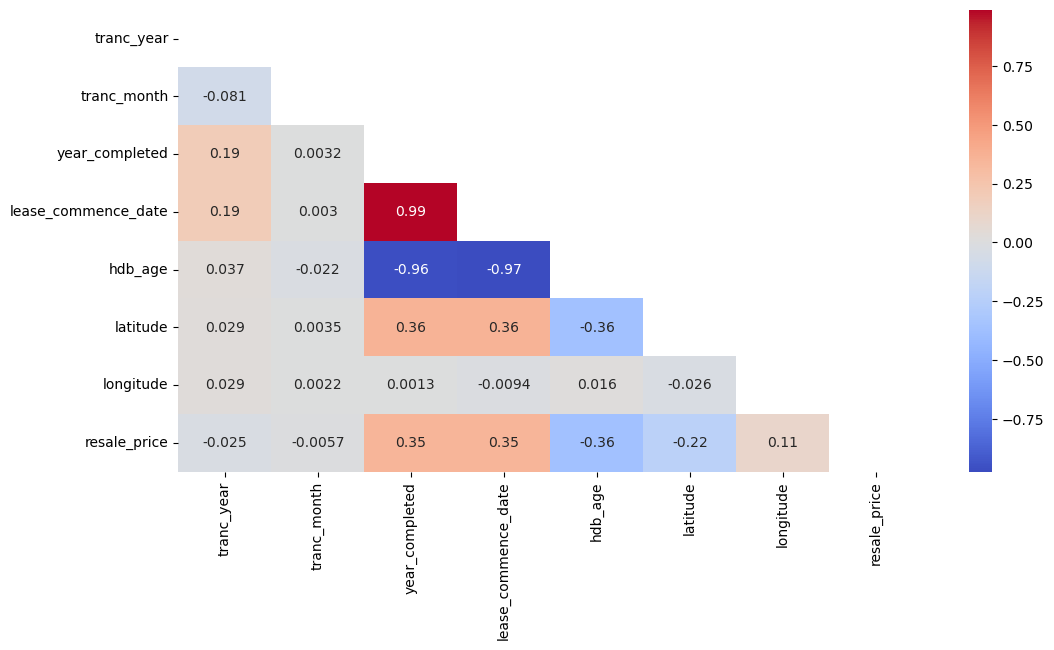

In [26]:
# Establish figure size:
plt.figure(figsize=(12, 6))

# Get correlation of numerical features:
corr = hdb[feat_txn_loc + target_var].corr(numeric_only=True)

# Set up heatmap mask:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation heatmap for numerical features:
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


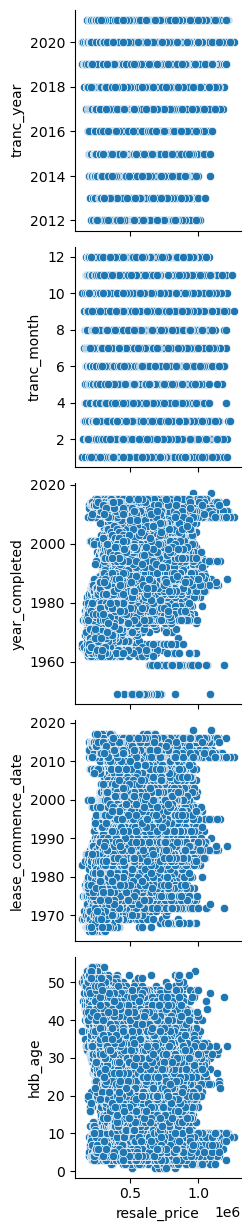

In [27]:
# Plot scatter plot for numerical features:
sns.pairplot(hdb, x_vars=['resale_price'], y_vars=['tranc_year', 'tranc_month', 'year_completed', 'lease_commence_date', 'hdb_age'])

array([[<Axes: title={'center': 'tranc_year'}>,
        <Axes: title={'center': 'tranc_month'}>,
        <Axes: title={'center': 'year_completed'}>],
       [<Axes: title={'center': 'lease_commence_date'}>,
        <Axes: title={'center': 'hdb_age'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'resale_price'}>, <Axes: >]], dtype=object)

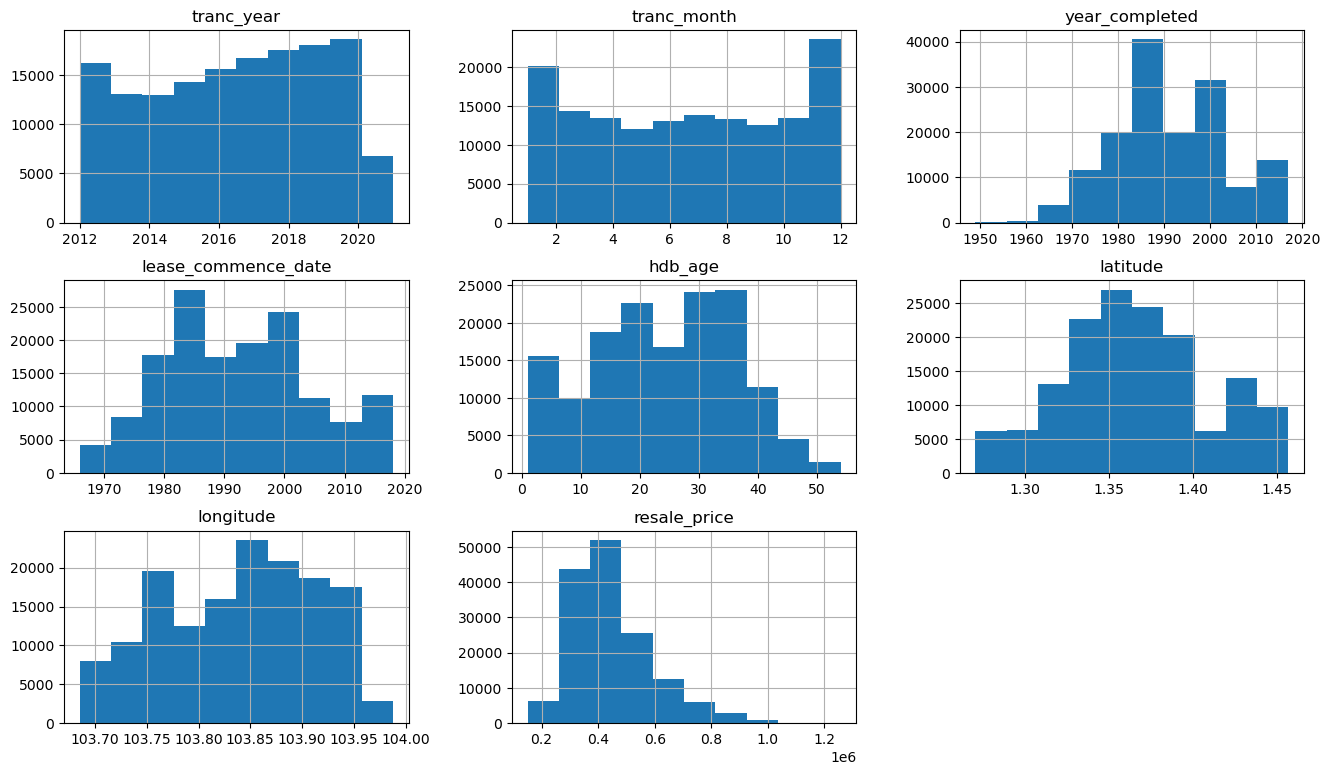

In [28]:
# Plot histogram for numerical features:
hdb[feat_txn_loc + target_var].hist(figsize=(16, 9))

In [29]:
# Check association between features 'planning_area' and 'town':

# Count unique values in 'planning_area' feature:
print(hdb['planning_area'].nunique())

# Count unique values in 'town' feature:
print(hdb['town'].nunique())

# Count unique values from joining features 'planning_area' and 'town':
print((hdb['planning_area'] + hdb['town']).nunique())

# Calculate count ratio of combined feature to 'town' feature:
37 / 26

32
26
37


1.4230769230769231

In [30]:
# Count unique values of address-related location features:

# Count unique values in 'street_name' feature:
print(hdb['street_name'].nunique())

# Count unique values in 'block' feature:
print(hdb['block'].nunique())

# Count unique values in 'address' feature:
print(hdb['address'].nunique())

# Count unique values in 'postal' feature:
print(hdb['postal'].nunique())

# Count unique values in 'latitude' feature:
print(hdb['latitude'].nunique())

# Count unique values in 'longitude' feature:
print(hdb['longitude'].nunique())

547
2440
9015
17270
8984
8956


/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


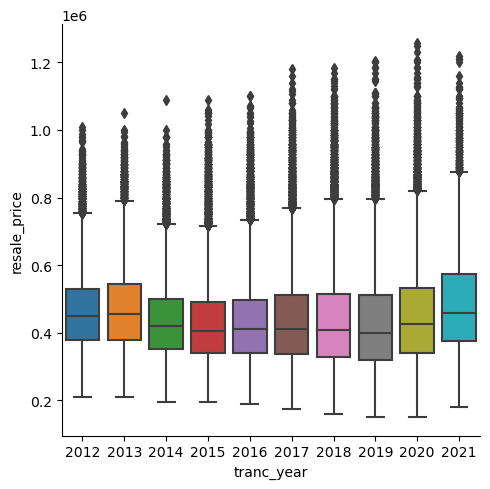

In [31]:
# Plot catplot for 'tranc_year' feature:
sns.catplot(data=hdb, x='tranc_year', y='resale_price', kind="box")

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


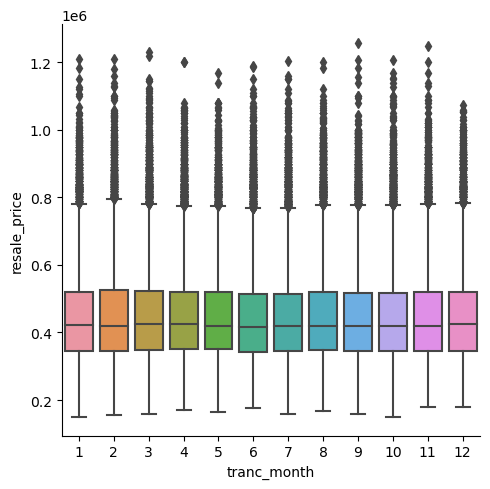

In [32]:
# Plot catplot for 'tranc_month' feature:
sns.catplot(data=hdb, x='tranc_month', y='resale_price', kind="box")

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


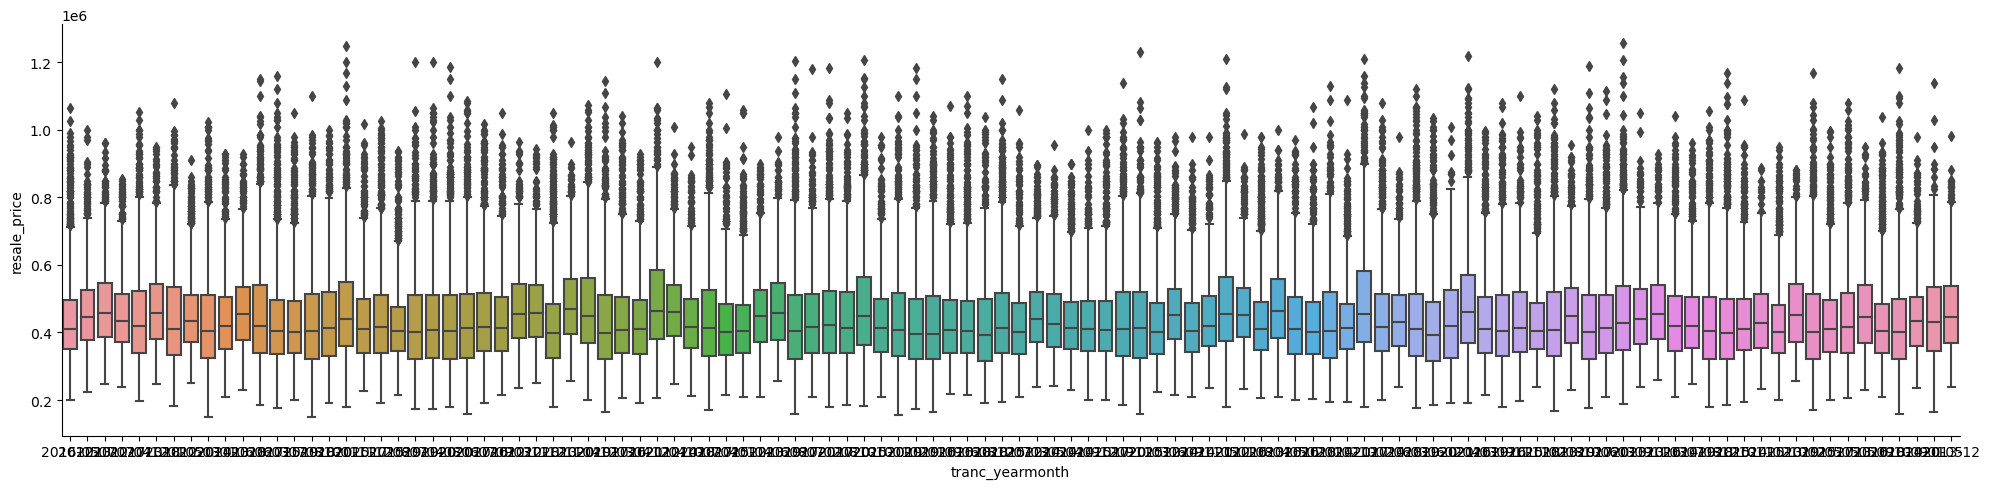

In [33]:
# Plot catplot for 'tranc_yearmonth' feature:
sns.catplot(data=hdb, x='tranc_yearmonth', y='resale_price', kind="box", aspect=4)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


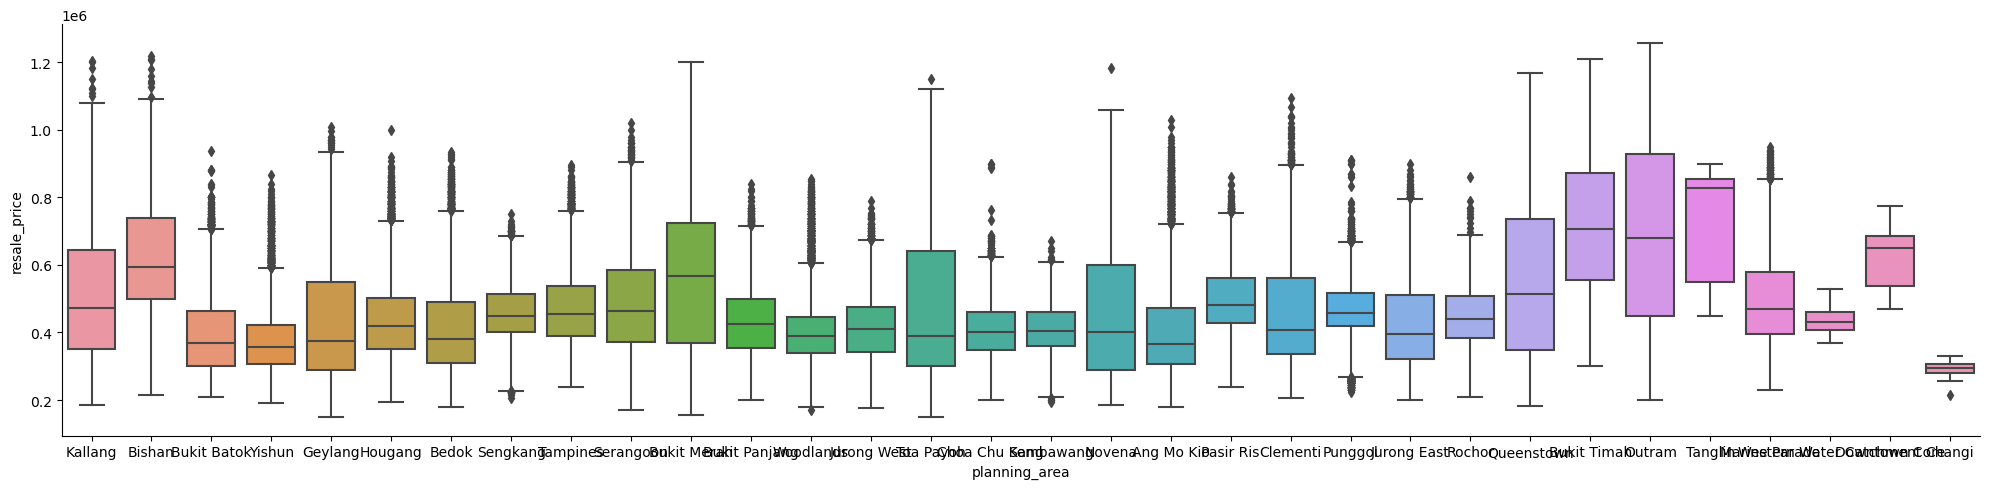

In [34]:
# Plot catplot for 'planning_area' feature:
sns.catplot(data=hdb, x='planning_area', y='resale_price', kind="box", aspect=4)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


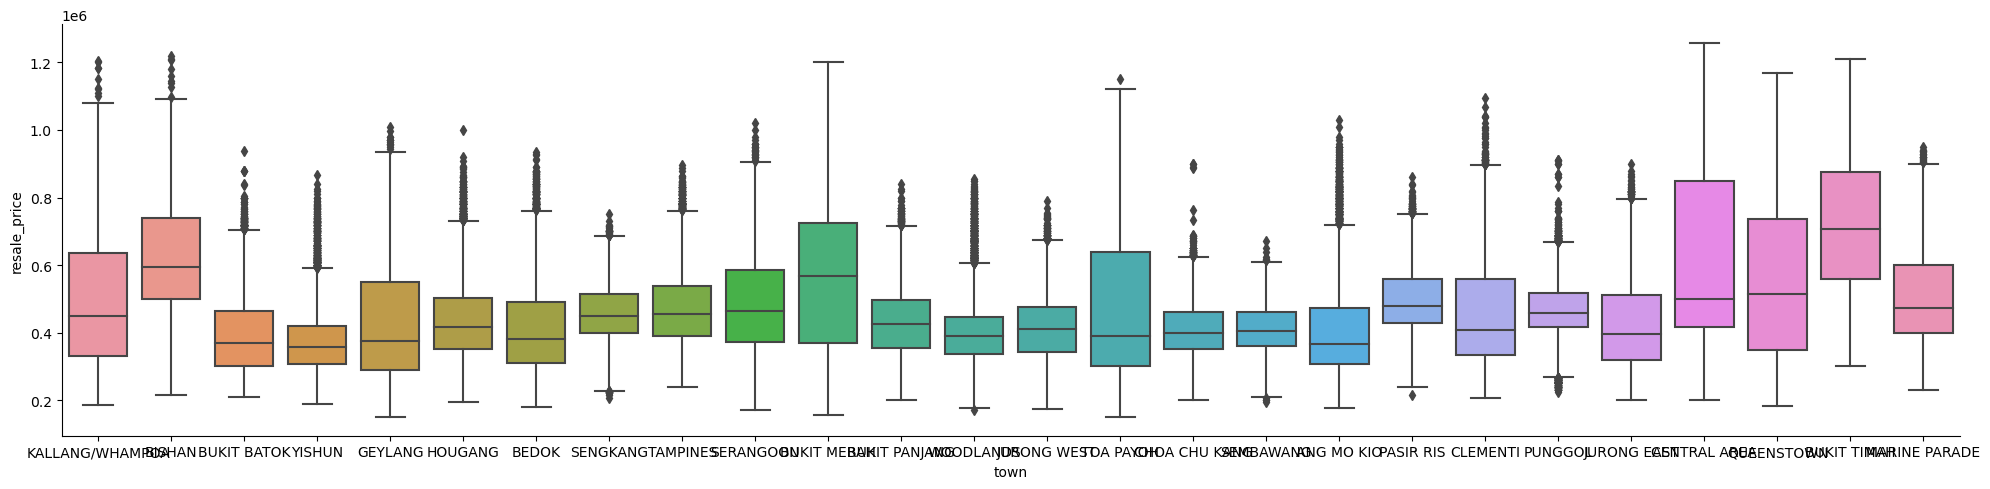

In [35]:
# Plot catplot for 'town' feature:
sns.catplot(data=hdb, x='town', y='resale_price', kind="box", aspect=4)

### 04.02 Observation(s) & Finding(s) (**Transaction & Location** Features)

<details><summary> Show details: </summary>

> **Numerical Features**
> - Features `year_completed`, `lease_commence_date`, and `hdb_age` are almost perfectly correlated with one another, which will cause multicollinearity in a linear regression model.
> - Features `year_completed` and `lease_commence_date` should be dropped to prevent multicollinearity, with the feature `hdb_age` kept.
> - Features `year_completed` (0.35), `lease_commence_date` (0.35), and `hdb_age` (-0.36) have some form of a linear relationship with the target variable `resale_price`, with a low correlations of 0.35, 0.35, and -0.36 respectively.
> - All other features do not have a linear relationship with the target variable `resale_price`, with little to no correlation with it.
> - Features `latitude` and `longitude` should be taken as categorical features since they have little to no correlation with the target variable `resale_price`.

> **Categorical Features**
> - Features `planning_area` and `town` are highly associated with one another, which will cause multicollinearity in a linear regression model.
> - Feature `town` should be dropped to prevent multicollinearity, with the feature `planning_area` kept since it has a more granular split for location than the feature `town`.
> - These features should be dropped since they have more than 550 unique values each, which will cause significant overfitting in a linear regression model:
>   - `street_name`
>   - `block`
>   - `address`
>   - `postal`
>   - `latitude`
>   - `longitude`
> - Features `year_completed` and `lease_commence_date` should be taken as numerical variables since they have some form of a linear relationship with the target variable `resale_price`. 
> - Feature `planning_area` should be able to sufficiently account for the effect of different locations without the need for address-related location features.
> - These features should be taken as categorical variables since they have no linear relationship (or observable quadratic relationship) with the target variable, `resale_price`:
>   - `tranc_year`
>   - `tranc_month`
>   - `tranc_yearmonth`
> - These features show some differences in average effect on the target variable `resale_price` from category to category:
>   - `tranc_year`
>   - `tranc_yearmonth`
>   - `planning_area`
>   - `town`
> - Feature `tranc_month` shows minimal differences in average effect on the target variable `resale_price` from category to category.

> **Distribution & Outliers**
> - Data collection seemed to have stopped sometime in 2020, with `tranc_year` showing relatively less data points for 2020.
> - House transactions seemed to be concentrated at the start and end of the year, with `tranc_month` showing a high frequency on both ends.

> **Follow-Up Actions**
> 1. **Drop** these features to prevent multicollinearity:
>   - `year_completed`
>   - `lease_commence_date`
>   - `town`
> 2. **Drop** these features to prevent significant overfitting:
>   - `street_name`
>   - `block`
>   - `address`
>   - `postal`
>   - `latitude`
>   - `longitude`
> 3. **Take** these features as categorical variables:
>   - `tranc_year`
>   - `tranc_month`
>   - `tranc_yearmonth`

</details>

### 04.03 Analyse **Block** Features

In [36]:
# Check data:
hdb[feat_block + target_var].head()

residential  commercial  market_hawker  multistorey_carpark  \
0            1           0              0                    0   
1            1           0              0                    0   
2            1           0              0                    0   
3            1           1              0                    0   
4            1           0              0                    0   

   precinct_pavilion  max_floor_lvl  total_dwelling_units  1room_sold  \
0                  0             25                   142           0   
1                  0              9                   112           0   
2                  0             16                    90           0   
3                  0             11                    75           0   
4                  0              4                    48           0   

   2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  multigen_sold  \
0           0           0          96          46          0              0   
1           0           0          56          56          0              0   
2           0           0           0          30         60              0   
3           0           0          68           7          0              0   
4           0           0          30          18          0              0   

   studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
0                      0             0             0             0   
1                      0             0             0             0   
2                      0             0             0             0   
3                      0             0             0             0   
4                      0             0             0             0   

   other_room_rental  resale_price  
0                  0      680000.0  
1                  0      665000.0  
2                  0      838000.0  
3                  0      550000.0  
4                  0      298000.0

In [37]:
# Summarise data:
hdb[feat_block].describe()

residential     commercial  market_hawker  multistorey_carpark  \
count     149805.0  149805.000000  149805.000000        149805.000000   
mean           1.0       0.191930       0.000100             0.000280   
std            0.0       0.393819       0.010006             0.016742   
min            1.0       0.000000       0.000000             0.000000   
25%            1.0       0.000000       0.000000             0.000000   
50%            1.0       0.000000       0.000000             0.000000   
75%            1.0       0.000000       0.000000             0.000000   
max            1.0       1.000000       1.000000             1.000000   

       precinct_pavilion  max_floor_lvl  total_dwelling_units     1room_sold  \
count      149805.000000  149805.000000         149805.000000  149805.000000   
mean            0.000754      15.107914            124.592070       0.139581   
std             0.027455       6.194526             58.309788       5.964397   
min             0.000000       2.000000              2.000000       0.000000   
25%             0.000000      12.000000             90.000000       0.000000   
50%             0.000000      13.000000            112.000000       0.000000   
75%             0.000000      16.000000            144.000000       0.000000   
max             1.000000      50.000000            570.000000     255.000000   

          2room_sold     3room_sold     4room_sold     5room_sold  \
count  149805.000000  149805.000000  149805.000000  149805.000000   
mean        1.765615      39.277033      49.927406      26.304082   
std        11.685666      68.858414      45.237296      33.489464   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000      14.000000       0.000000   
50%         0.000000       0.000000      44.000000       3.000000   
75%         0.000000      66.000000      73.000000      50.000000   
max       225.000000     528.000000     316.000000     164.000000   

           exec_sold  multigen_sold  studio_apartment_sold   1room_rental  \
count  149805.000000  149805.000000          149805.000000  149805.000000   
mean        5.973486       0.024105               0.431054       0.063963   
std        19.179633       1.138619               5.211552       2.033778   
min         0.000000       0.000000               0.000000       0.000000   
25%         0.000000       0.000000               0.000000       0.000000   
50%         0.000000       0.000000               0.000000       0.000000   
75%         0.000000       0.000000               0.000000       0.000000   
max       135.000000      66.000000             142.000000     110.000000   

        2room_rental   3room_rental  other_room_rental  
count  149805.000000  149805.000000      149805.000000  
mean        0.625827       0.059577           0.000340  
std        11.224543       0.669054           0.024372  
min         0.000000       0.000000           0.000000  
25%         0.000000       0.000000           0.000000  
50%         0.000000       0.000000           0.000000  
75%         0.000000       0.000000           0.000000  
max       452.000000      24.000000           2.000000

In [38]:
# Count unique values for 'residential' feature:
len(hdb['residential'].unique())

1

<Axes: >

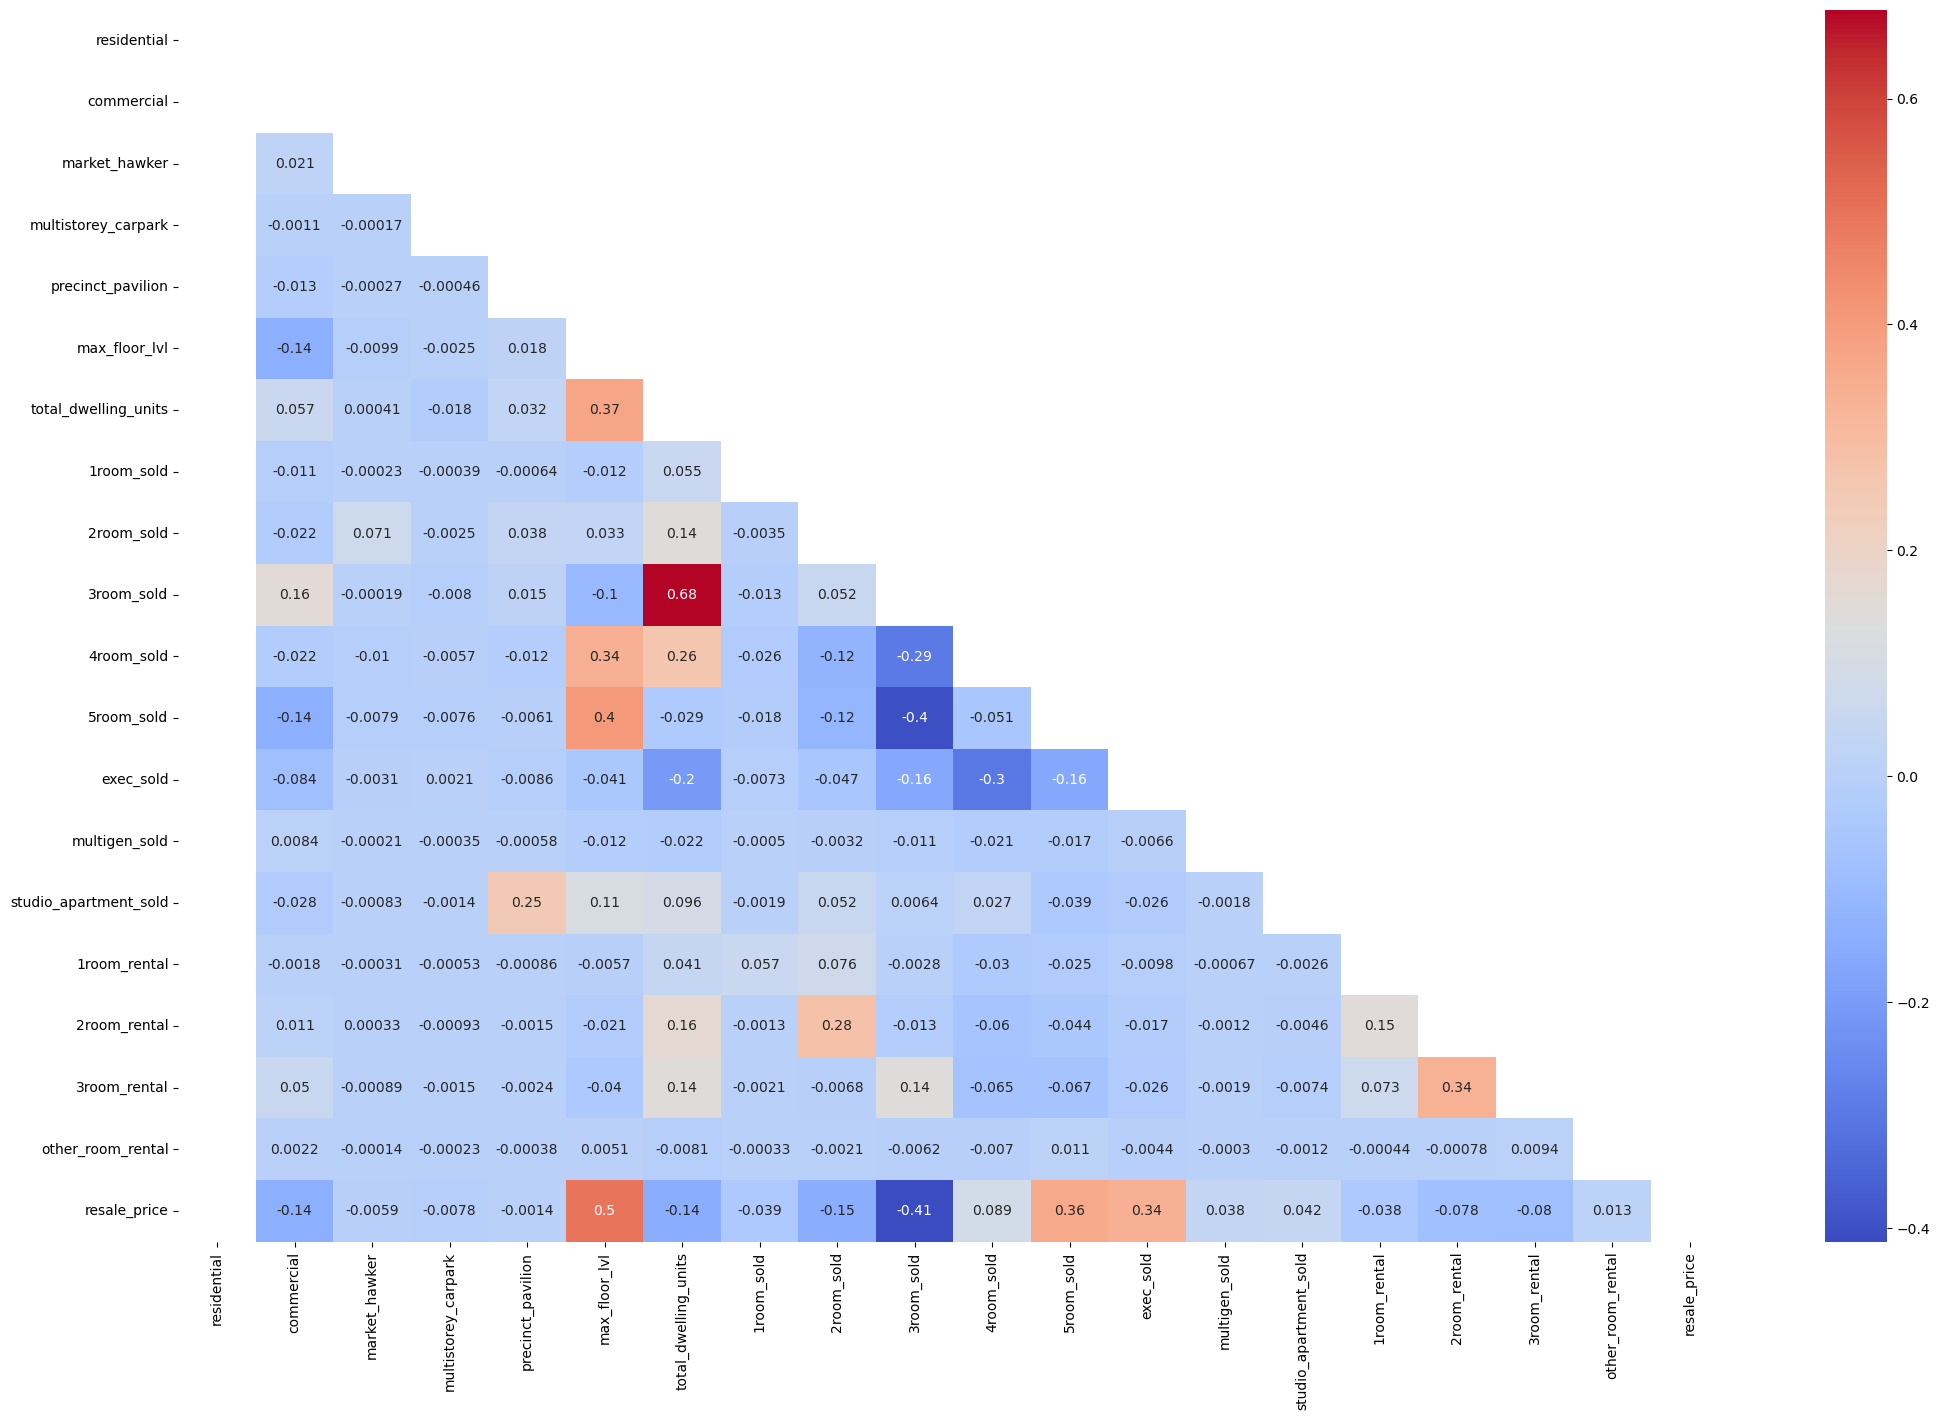

In [39]:
# Establish figure size:
plt.figure(figsize=(25, 16))

# Get correlation of numerical features:
corr = hdb[feat_block + target_var].corr(numeric_only=True)

# Set up heatmap mask:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation heatmap for numerical features:
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


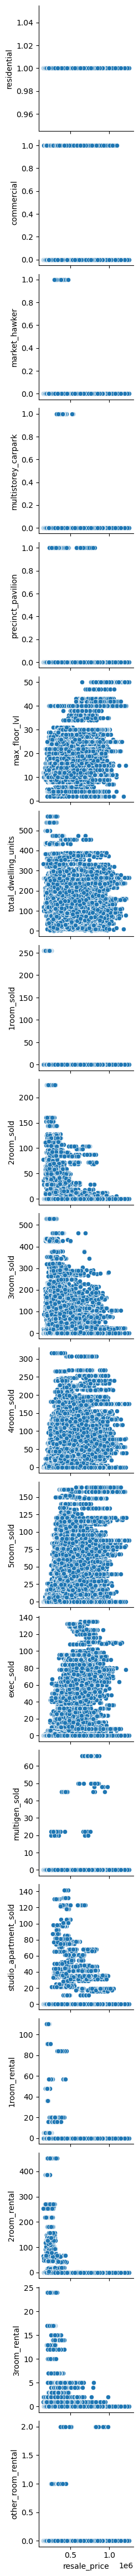

In [40]:
# Plot scatter plot for numerical features:
sns.pairplot(hdb, x_vars=['resale_price'], y_vars=feat_block)

array([[<Axes: title={'center': 'residential'}>,
        <Axes: title={'center': 'commercial'}>,
        <Axes: title={'center': 'market_hawker'}>,
        <Axes: title={'center': 'multistorey_carpark'}>],
       [<Axes: title={'center': 'precinct_pavilion'}>,
        <Axes: title={'center': 'max_floor_lvl'}>,
        <Axes: title={'center': 'total_dwelling_units'}>,
        <Axes: title={'center': '1room_sold'}>],
       [<Axes: title={'center': '2room_sold'}>,
        <Axes: title={'center': '3room_sold'}>,
        <Axes: title={'center': '4room_sold'}>,
        <Axes: title={'center': '5room_sold'}>],
       [<Axes: title={'center': 'exec_sold'}>,
        <Axes: title={'center': 'multigen_sold'}>,
        <Axes: title={'center': 'studio_apartment_sold'}>,
        <Axes: title={'center': '1room_rental'}>],
       [<Axes: title={'center': '2room_rental'}>,
        <Axes: title={'center': '3room_rental'}>,
        <Axes: title={'center': 'other_room_rental'}>,
        <Axes: title={'ce

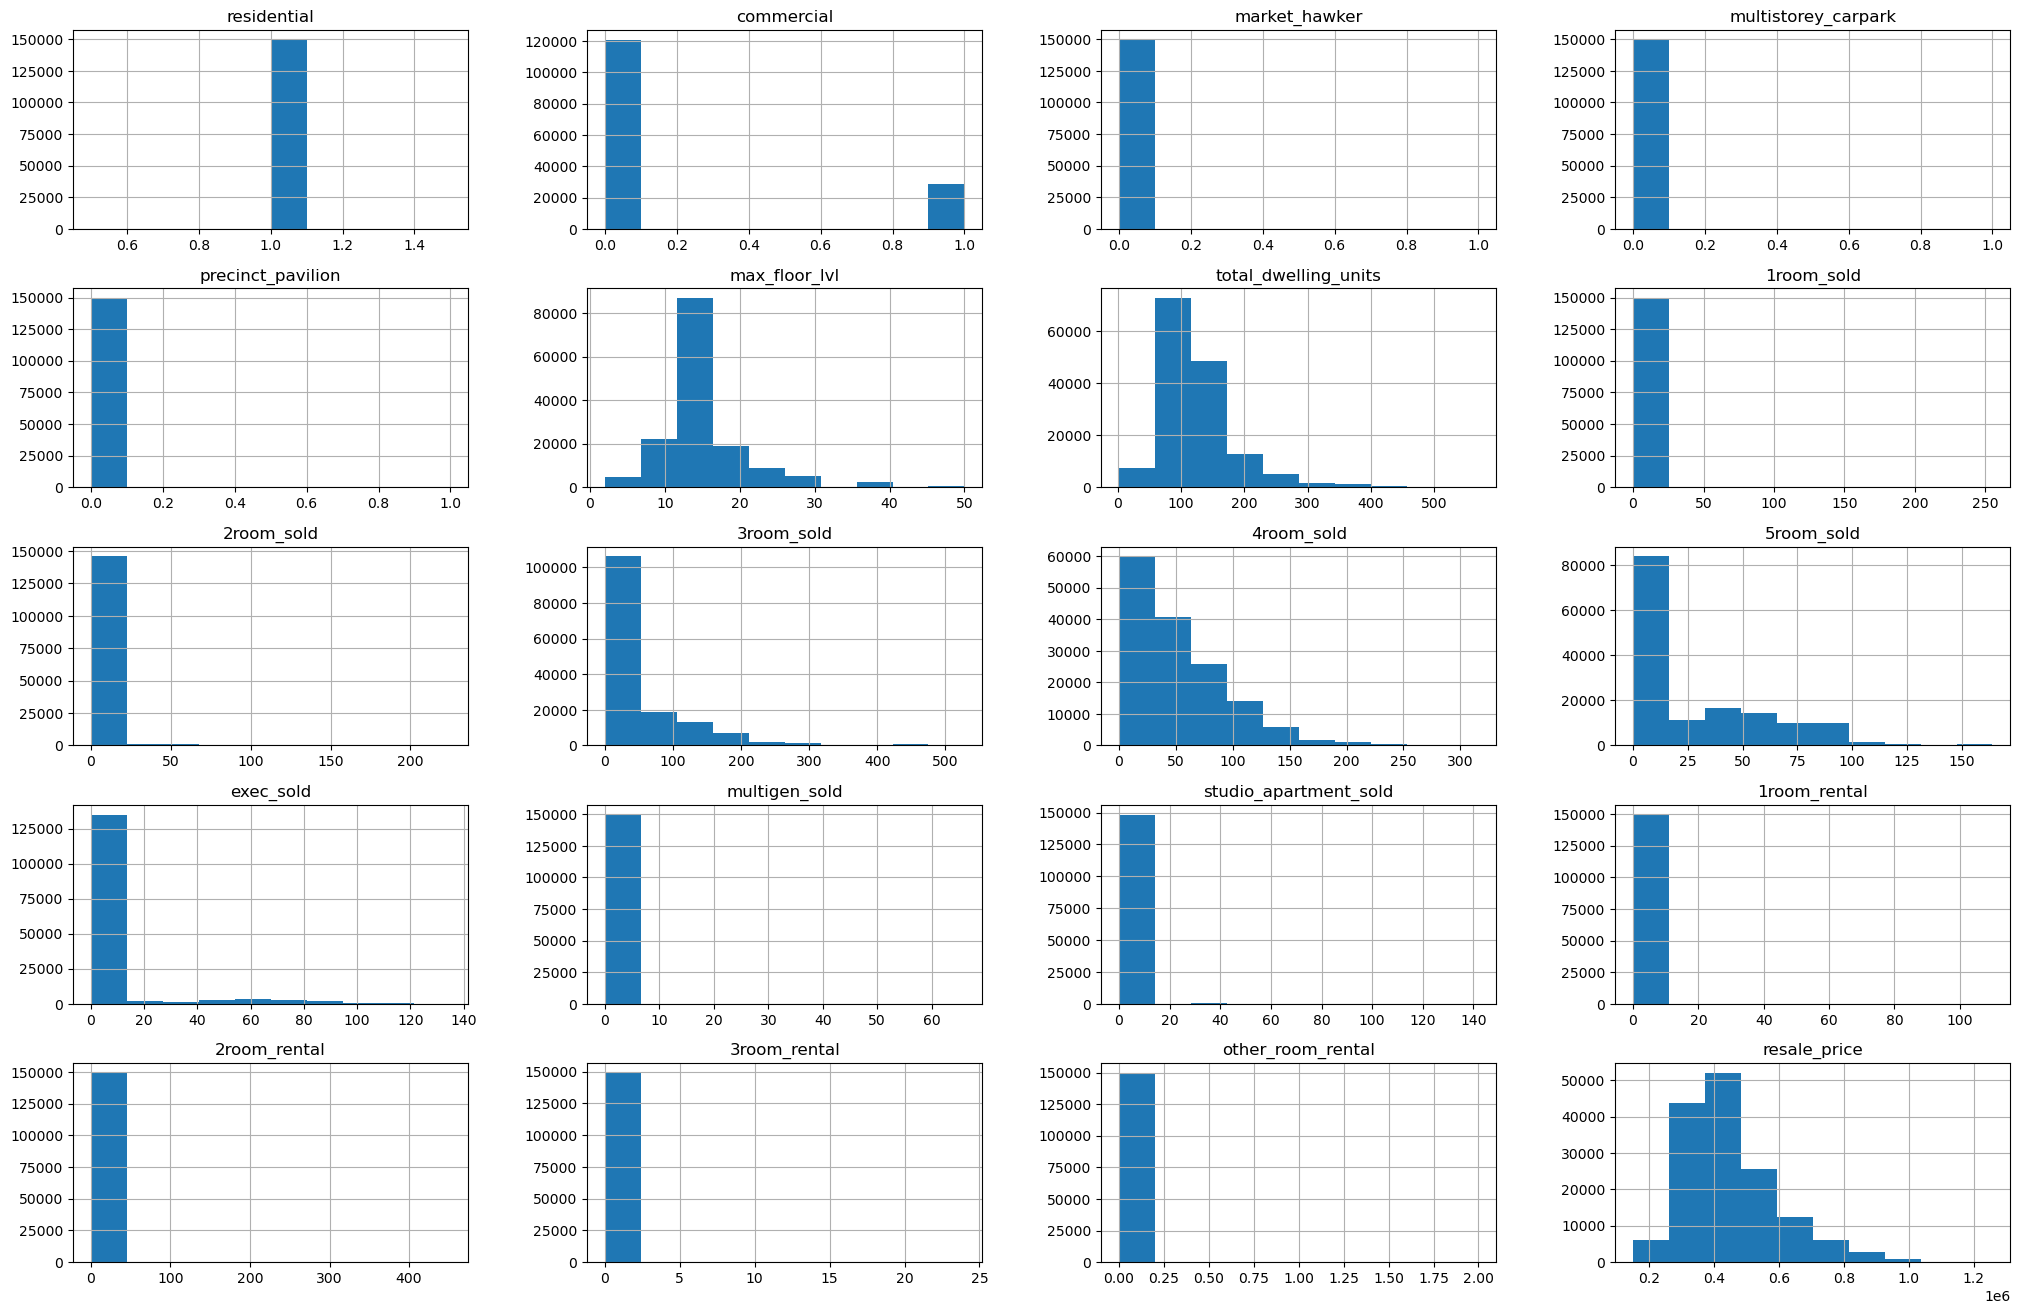

In [41]:
# Plot histogram for numerical features:
hdb[feat_block + target_var].hist(figsize=(25, 16))

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


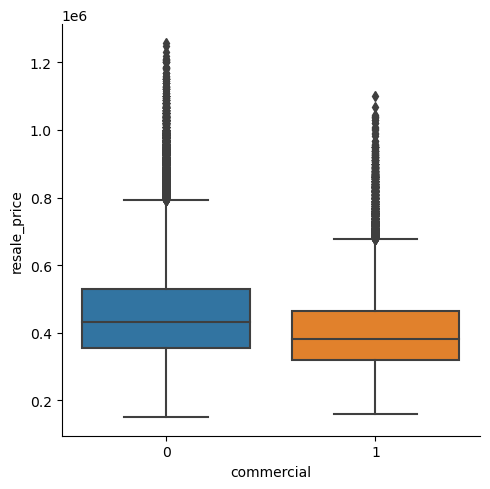

In [42]:
# Plot catplot for 'commercial' feature:
sns.catplot(data=hdb, x='commercial', y='resale_price', kind="box")

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


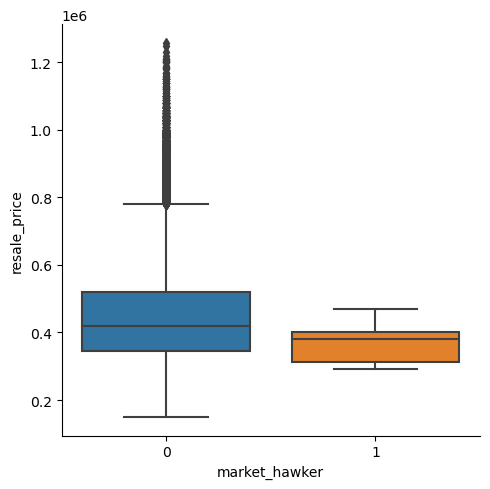

In [43]:
# Plot catplot for 'market_hawker' feature:
sns.catplot(data=hdb, x='market_hawker', y='resale_price', kind="box")

In [44]:
# Check distribution of categories in feature 'market_hawker' by 'full_flat_type':
print(hdb[hdb['market_hawker'] == 0]['id'].groupby(hdb['full_flat_type']).count())
print('\n')
print(hdb[hdb['market_hawker'] == 1]['id'].groupby(hdb['full_flat_type']).count())

# Calculate proportion of category 0 in feature 'market_hawker':
print('\n')
print(hdb[hdb['market_hawker'] == 1]['id'].count() / hdb['id'].count())

full_flat_type
1 ROOM Improved                         82
2 ROOM 2-room                            4
2 ROOM DBSS                              1
2 ROOM Improved                        521
2 ROOM Model A                         730
2 ROOM Premium Apartment                37
2 ROOM Standard                        587
3 ROOM DBSS                            177
3 ROOM Improved                      10238
3 ROOM Model A                        8335
3 ROOM New Generation                15227
3 ROOM Premium Apartment               391
3 ROOM Simplified                     1929
3 ROOM Standard                       2514
3 ROOM Terrace                          86
4 ROOM Adjoined flat                    27
4 ROOM DBSS                            598
4 ROOM Improved                       1847
4 ROOM Model A                       34780
4 ROOM Model A2                       2064
4 ROOM New Generation                 8139
4 ROOM Premium Apartment              7541
4 ROOM Premium Apartment Loft          

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


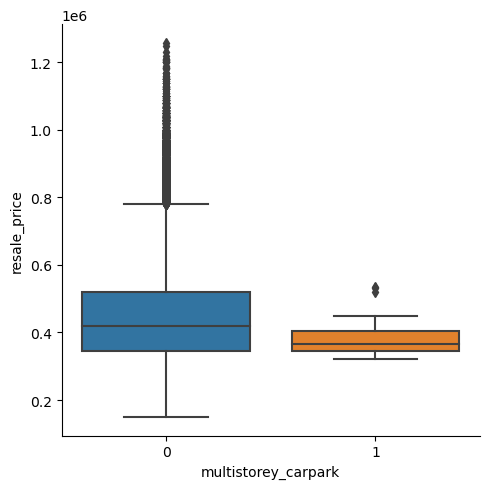

In [45]:
# Plot catplot for 'multistorey_carpark' feature:
sns.catplot(data=hdb, x='multistorey_carpark', y='resale_price', kind="box")

In [46]:
# Check distribution of categories in feature 'multistorey_carpark' by 'full_flat_type':
print(hdb[hdb['multistorey_carpark'] == 0]['id'].groupby(hdb['full_flat_type']).count())
print('\n')
print(hdb[hdb['multistorey_carpark'] == 1]['id'].groupby(hdb['full_flat_type']).count())

# Calculate proportion of category 0 in feature 'multistorey_carpark':
print('\n')
print(hdb[hdb['multistorey_carpark'] == 1]['id'].count() / hdb['id'].count())

full_flat_type
1 ROOM Improved                         82
2 ROOM 2-room                            4
2 ROOM DBSS                              1
2 ROOM Improved                        521
2 ROOM Model A                         730
2 ROOM Premium Apartment                37
2 ROOM Standard                        594
3 ROOM DBSS                            177
3 ROOM Improved                      10238
3 ROOM Model A                        8335
3 ROOM New Generation                15227
3 ROOM Premium Apartment               391
3 ROOM Simplified                     1922
3 ROOM Standard                       2522
3 ROOM Terrace                          86
4 ROOM Adjoined flat                    27
4 ROOM DBSS                            598
4 ROOM Improved                       1847
4 ROOM Model A                       34780
4 ROOM Model A2                       2064
4 ROOM New Generation                 8139
4 ROOM Premium Apartment              7519
4 ROOM Premium Apartment Loft          

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


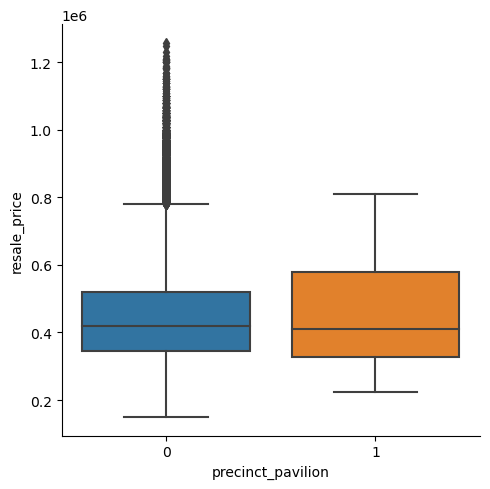

In [47]:
# Plot catplot for 'precinct_pavilion' feature:
sns.catplot(data=hdb, x='precinct_pavilion', y='resale_price', kind="box")

In [48]:
# Check distribution of categories in feature 'precinct_pavilion' by 'full_flat_type':
print(hdb[hdb['precinct_pavilion'] == 0]['id'].groupby(hdb['full_flat_type']).count())
print('\n')
print(hdb[hdb['precinct_pavilion'] == 1]['id'].groupby(hdb['full_flat_type']).count())

# Calculate proportion of category 0 in feature 'precinct_pavilion':
print('\n')
print(hdb[hdb['precinct_pavilion'] == 1]['id'].count() / hdb['id'].count())

full_flat_type
1 ROOM Improved                         82
2 ROOM 2-room                            4
2 ROOM DBSS                              1
2 ROOM Improved                        521
2 ROOM Model A                         722
2 ROOM Premium Apartment                37
2 ROOM Standard                        594
3 ROOM DBSS                            173
3 ROOM Improved                      10238
3 ROOM Model A                        8270
3 ROOM New Generation                15227
3 ROOM Premium Apartment               391
3 ROOM Simplified                     1929
3 ROOM Standard                       2522
3 ROOM Terrace                          86
4 ROOM Adjoined flat                    27
4 ROOM DBSS                            590
4 ROOM Improved                       1847
4 ROOM Model A                       34765
4 ROOM Model A2                       2064
4 ROOM New Generation                 8139
4 ROOM Premium Apartment              7541
4 ROOM Premium Apartment Loft          

### 04.03 Observation(s) & Finding(s) (**Block** Features)

<details><summary> Show details: </summary>

> **Numerical Features**
> - Features `total_dwelling_units` and `3room_sold` have a moderate correlation with each other of 0.68.
> - Feature `max_floor_lvl` (0.5) has some form of a linear relationship with the target variable `resale_price`, with a moderate correlation of 0.5.
> - Features `3room_sold` (-0.41), `5room_sold` (0.36), and `exec_sold` (0.34) have some form of a linear relationship with the target variable `resale_price`, with low correlations of -0.41, 0.36, and 0.34 respectively.
> - All other features do not have a linear relationship with the target variable `resale_price`, with little to no correlation with it.

> **Categorical Features**
> - Feature `residential` should be dropped as it is redundant, with only a single type of value.
> - Feature `commercial` shows some difference in average effect on the target variable `resale_price` from category to category.
> - Feature `market_hawker` shows some difference in average effect on the target variable `resale_price` from category to category, with most of the data concentrated in the 0 category.
> - Feature `market_hawker` category 1 is associated with a significantly small subset of full flat types (`full_flat_type`) (0.00%).
> - Feature `multistorey_carpark` shows some difference in average effect on the target variable `resale_price` from category to category, with most of the data concentrated in the 0 category.
> - Feature `multistorey_carpark` category 1 is associated with a significantly small subset of full flat types (`full_flat_type`) (0.02%).
> - Feature `precinct_pavilion` shows minimal difference in average effect on the target variable `resale_price` from category to category, with most of the data concentrated in the 0 category.
> - Feature `precinct_pavilion` category 1 is associated with a significantly small subset of full flat types (`full_flat_type`) (0.09%).

> **Distribution & Outliers**
> - `max_floor_lvl` seems to be concentrated somewhere in the middle of the 10-20 range, with a significant right skew from the 35-50 range with outliers. This is indicative of special hdb properties such as the Pinnacle @ Duxton.
> - `total_dwelling_units` seem to be concentrated in the 50-150 range, with a significant right skew from the 300-450 range with outliers, which would be indicative of bigger/taller blocks.
> - `3room_sold` and `5room_sold` have a right skew with most of the block concentrated in the 0-50 and 0-20 range respectively.
> - `4room_sold` seems to form the  bulk of hdb flat types sold, with such units concentrated in the 40-60 range, with less of a right skew than `3room_sold` and `4room_sold`.

> **Follow-Up Actions**
> 1. **Drop** redundant feature `residential`.

</details>

### 04.04 Analyse **Flat** Features

In [49]:
# Check data:
hdb[feat_flat + target_var].head()

flat_type  flat_model       full_flat_type storey_range  lower  mid  upper  \
0     4 ROOM     Model A       4 ROOM Model A     10 TO 12     10   11     12   
1     5 ROOM    Improved      5 ROOM Improved     07 TO 09      7    8      9   
2  EXECUTIVE   Apartment  EXECUTIVE Apartment     13 TO 15     13   14     15   
3     4 ROOM     Model A       4 ROOM Model A     01 TO 05      1    3      5   
4     4 ROOM  Simplified    4 ROOM Simplified     01 TO 03      1    2      3   

   mid_storey  floor_area_sqm  floor_area_sqft  resale_price  
0          11            90.0          968.760      680000.0  
1           8           130.0         1399.320      665000.0  
2          14           144.0         1550.016      838000.0  
3           3           103.0         1108.692      550000.0  
4           2            83.0          893.412      298000.0

In [50]:
# Summarise data:
hdb[feat_flat + target_var].describe()

lower            mid          upper     mid_storey  \
count  149805.000000  149805.000000  149805.000000  149805.000000   
mean        7.226955       8.263609       9.300264       8.263609   
std         5.489195       5.482182       5.481607       5.482182   
min         1.000000       2.000000       3.000000       2.000000   
25%         4.000000       5.000000       6.000000       5.000000   
50%         7.000000       8.000000       9.000000       8.000000   
75%        10.000000      11.000000      12.000000      11.000000   
max        49.000000      50.000000      51.000000      50.000000   

       floor_area_sqm  floor_area_sqft  resale_price  
count   149805.000000    149805.000000  1.498050e+05  
mean        97.228022      1046.562426  4.486621e+05  
std         24.438881       263.060119  1.432125e+05  
min         31.000000       333.684000  1.500000e+05  
25%         75.000000       807.300000  3.460000e+05  
50%         95.000000      1022.580000  4.200000e+05  
75%        112.000000      1205.568000  5.200000e+05  
max        280.000000      3013.920000  1.258000e+06

In [51]:
# Check if features 'mid' and 'mid-storey' have the same value:
hdb[hdb['mid'] != hdb['mid_storey']]['id'].count()

0

<Axes: >

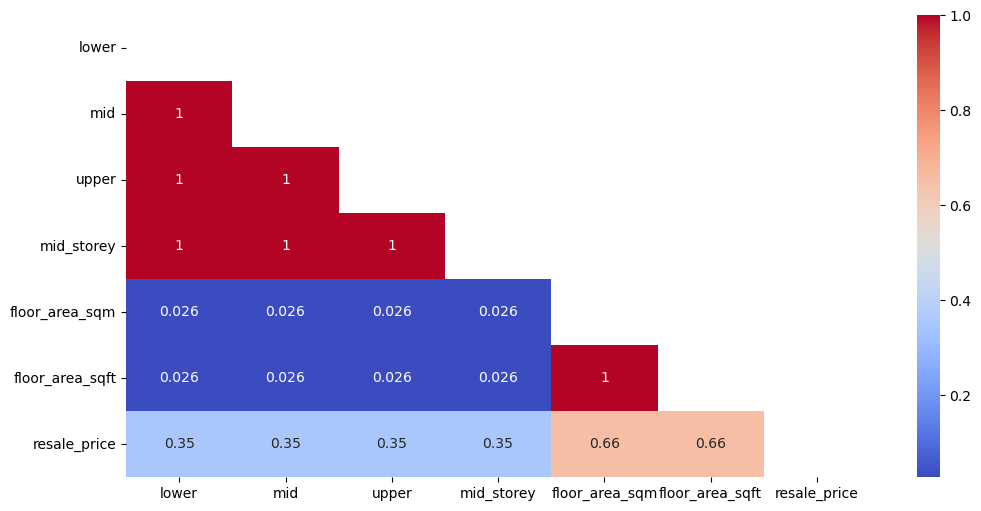

In [52]:
# Establish figure size:
plt.figure(figsize=(12, 6))

# Get correlation of numerical features:
corr = hdb[feat_flat + target_var].corr(numeric_only=True)

# Set up heatmap mask:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation heatmap for numerical features:
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


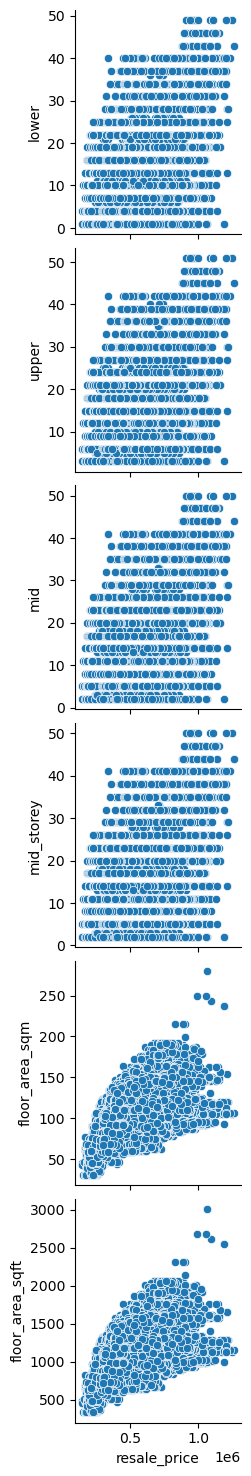

In [53]:
# Plot scatter plot for numerical features:
sns.pairplot(hdb, x_vars=['resale_price'], y_vars=['lower', 'upper', 'mid', 'mid_storey', 'floor_area_sqm', 'floor_area_sqft'])

array([[<Axes: title={'center': 'lower'}>,
        <Axes: title={'center': 'mid'}>,
        <Axes: title={'center': 'upper'}>],
       [<Axes: title={'center': 'mid_storey'}>,
        <Axes: title={'center': 'floor_area_sqm'}>,
        <Axes: title={'center': 'floor_area_sqft'}>],
       [<Axes: title={'center': 'resale_price'}>, <Axes: >, <Axes: >]],
      dtype=object)

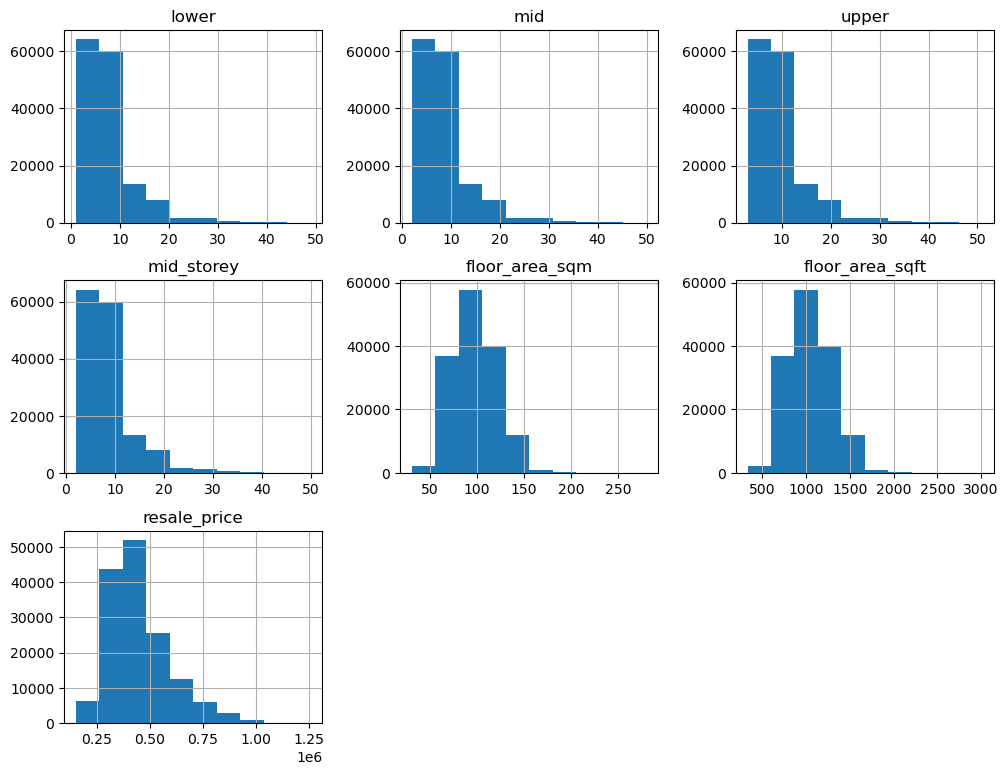

In [54]:
# Plot histogram for numerical features:
hdb[feat_flat + target_var].hist(figsize=(12, 9))

In [55]:
# Check association between features 'flat_type', 'flat_model', and 'full_flat_type':

# Count unique values in 'flat_type' feature:
print(hdb['flat_type'].nunique())

# Count unique values in 'flat_model' feature:
print(hdb['flat_model'].nunique())

# Count unique values from joining features 'full_flat_type':
print(hdb['full_flat_type'].nunique())

# Calculate count ratio of feature 'full_flat_type' to 'flat_type' feature:
43 / 7

7
20
43


6.142857142857143

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


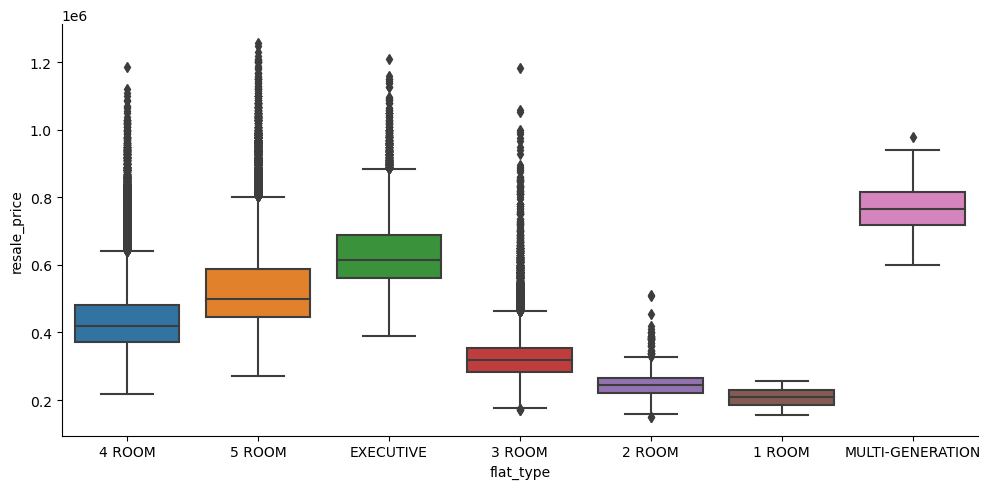

In [56]:
# Plot catplot for 'flat_type' feature:
sns.catplot(data=hdb, x='flat_type', y='resale_price', kind="box", aspect=2)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


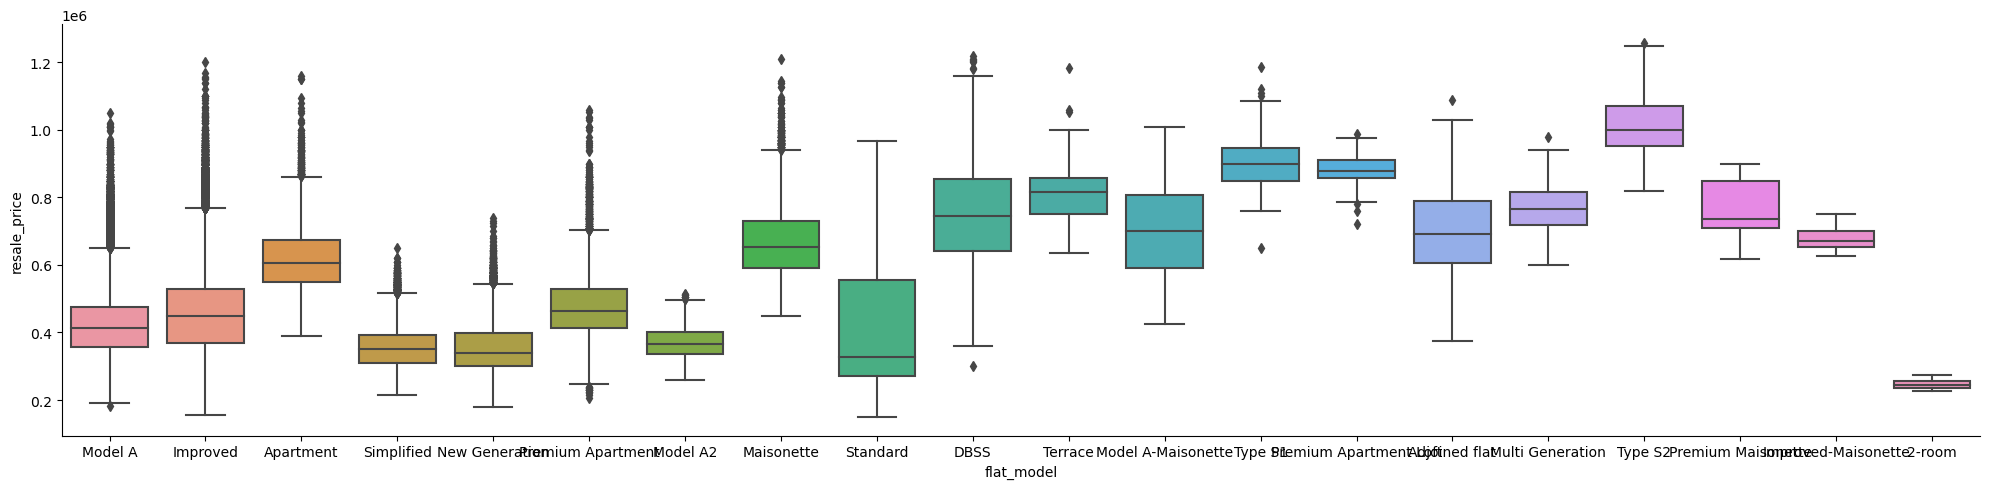

In [57]:
# Plot catplot for 'flat_model' feature:
sns.catplot(data=hdb, x='flat_model', y='resale_price', kind="box", aspect=4)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


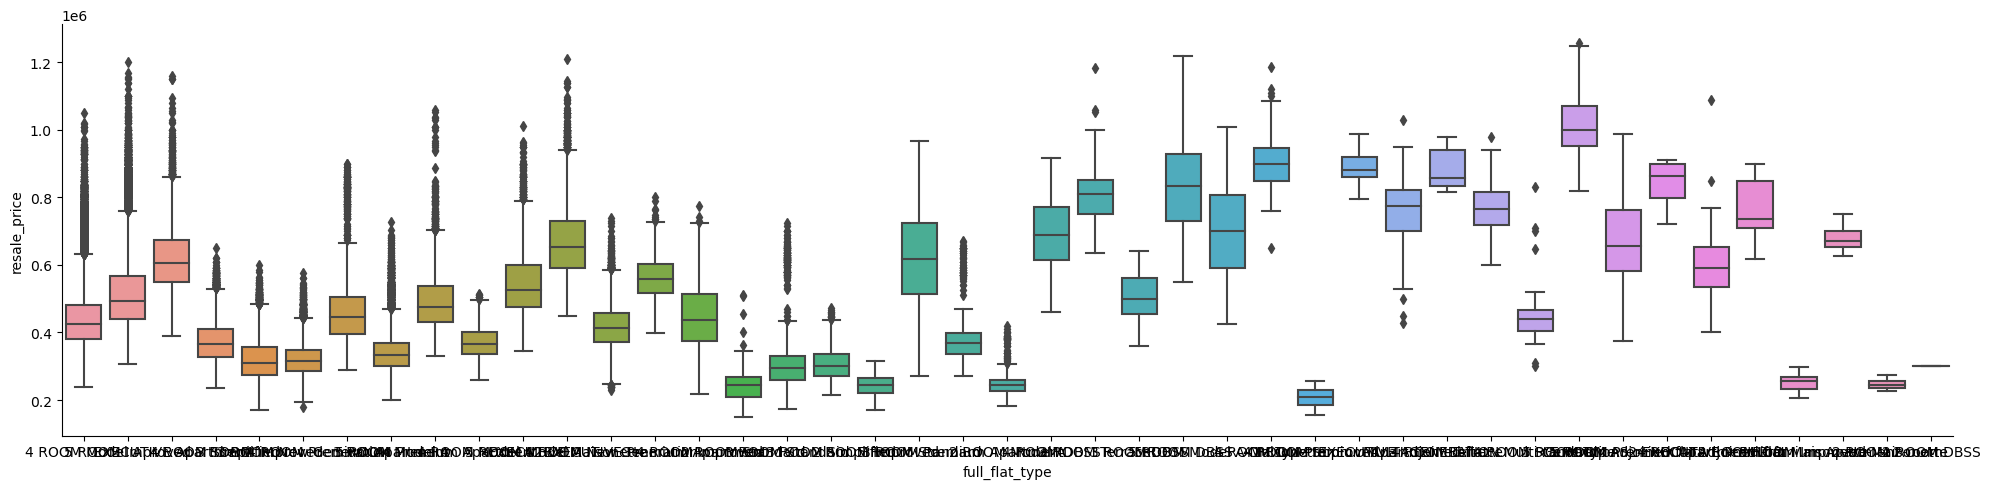

In [58]:
# Plot catplot for 'full_flat_type' feature:
sns.catplot(data=hdb, x='full_flat_type', y='resale_price', kind="box", aspect=4)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


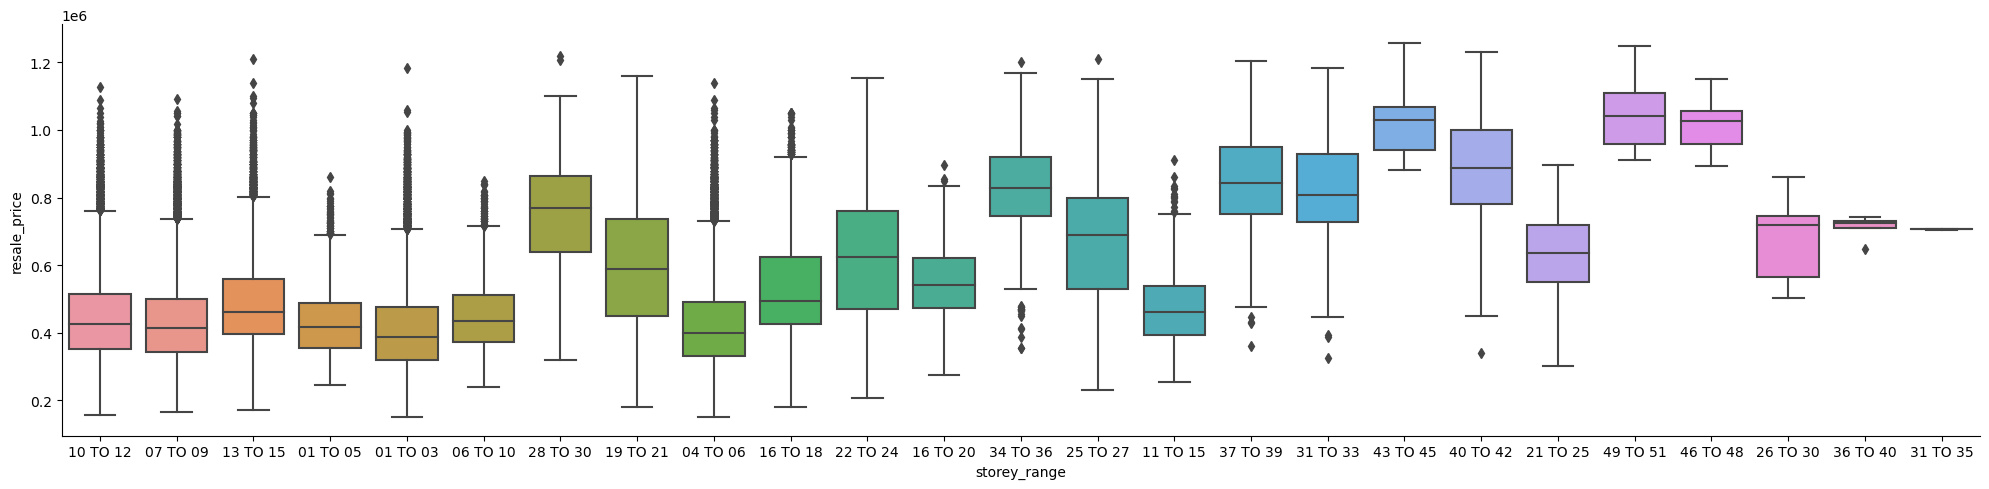

In [59]:
# Plot catplot for 'storey_range' feature:
sns.catplot(data=hdb, x='storey_range', y='resale_price', kind="box", aspect=4)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


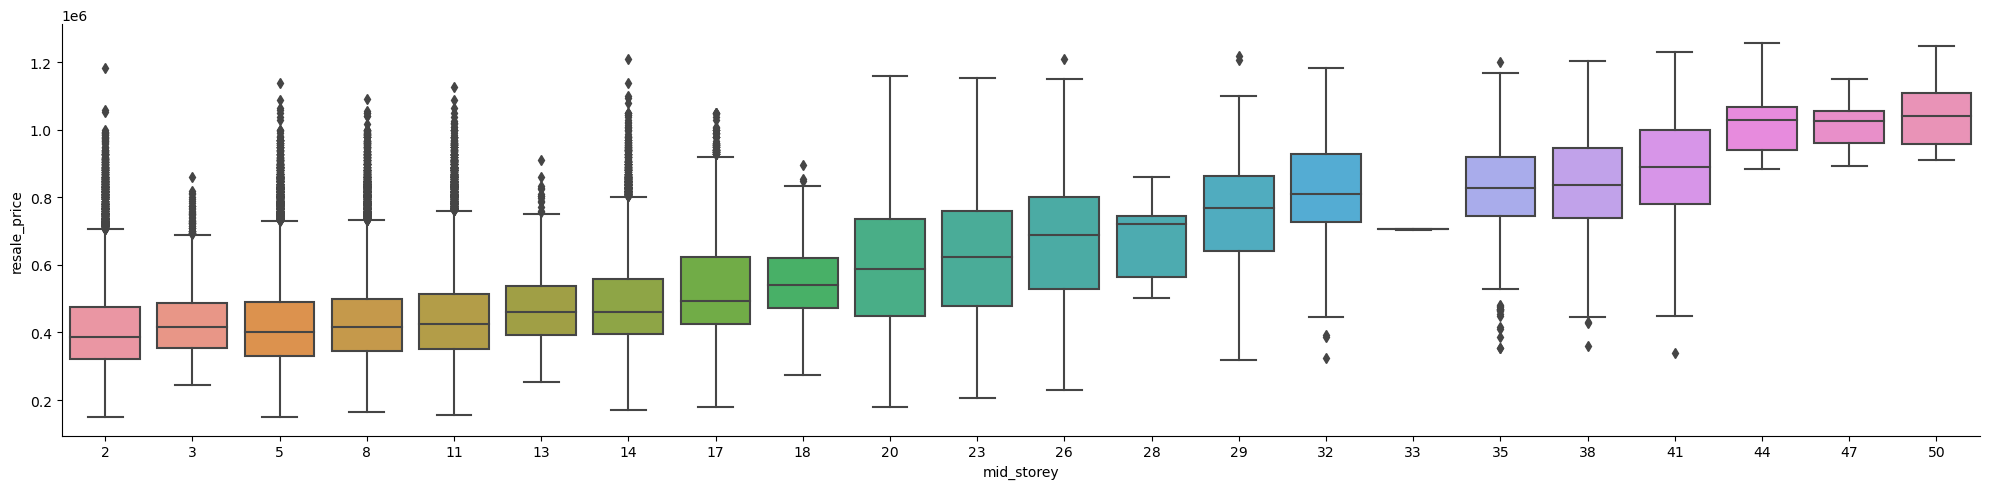

In [60]:
# Plot catplot for 'mid_storey' feature:
sns.catplot(data=hdb, x='mid_storey', y='resale_price', kind="box", aspect=4)

### 04.04 Observation(s) & Finding(s) (**Flat** Features)

<details><summary> Show details: </summary>

> **Numerical Features**
> - Features `mid` and `mid_storey` have the same values and only one feature should be kept.
> - Features `lower`, `mid`, `upper`, and `mid_storey` are perfectly correlated with one another, which will cause multicollinearity in a linear regression model.
> - Features `lower`, `mid`, and `upper` should be dropped to prevent multicollinearity, with feature `mid_storey` kept.
> - Features `floor_area_sqm` and `floor_area_sqft` are perfectly correlated with each another, which will cause multicollinearity in a linear regression model.
> - Feature `floor_area_sqm` should be dropped to prevent multicollinearity, with feature `floor_area_sqft` kept.
> - Features `floor_area_sqm` (0.65) and `floor_area_sqft` (0.65) have some form of a linear relationship with the target variable `resale_price`, with moderate correlations of 0.65 each.
> - Features `lower` (0.35), `mid` (0.35), `upper` (0.35), and `mid_storey` (0.35) have some form of a linear relationship with the target variable `resale_price`, with low correlations of 0.35 each.

> **Categorical Features**
> - Features `storey_range`, `lower`, `mid`, `upper`, and `mid_storey` are highly associated with one another, which will cause multicollinearity in a linear regression model.
> - Feature `storey_range` should be dropped to prevent multicollinearity, with the feature `mid_storey` kept.
> - These features should be taken as numerical variables since they have some form of a linear relationship with the target variable `resale_price`:
>   - `lower`
>   - `mid`
>   - `upper`
>   - `mid_storey`
> - Features `flat_type`, `flat_model`, and `full_flat_type` show some differences in average effect on the target variable `resale_price` from category to category.

> **Distribution & Outliers**
> - `lower`, `mid`, `upper`, and `mid_storey` have similar distributions with concentration in the 0-10 range and a right skew. This concurs with the right skew in `max_floor_level` that has a right skew as well for unique hdb properties.

> **Follow-Up Actions**
> 1. **Drop** these features to prevent multicollinearity:
>   - `storey_range`
>   - `lower`
>   - `mid`
>   - `upper`
>   - `floor_area_sqm`
> 2. **Take** these features as numerical variables:
>   - `lower`
>   - `mid`
>   - `upper`
>   - `mid_storey`

</details>

### 04.05 Analyse **Public Transport** Features

In [61]:
# Check data:
hdb[feat_pub_transport + target_var].head()

bus_stop_name  bus_interchange  bus_stop_nearest_distance  \
0                    Blk 3B                0                  29.427395   
1              BLK 151A MKT                1                  58.207761   
2                  Blk 289E                1                 214.747860   
3  Opp Bishan Nth Shop Mall                1                  43.396521   
4                   Blk 873                0                 129.422752   

   bus_stop_latitude  bus_stop_longitude     mrt_name  mrt_interchange  \
0           1.314433          103.872600      Kallang                0   
1           1.345659          103.855381       Bishan                1   
2           1.344064          103.758613  Bukit Batok                0   
3           1.358045          103.845169       Bishan                1   
4           1.415424          103.836477       Khatib                0   

   mrt_nearest_distance  mrt_latitude  mrt_longitude  resale_price  
0            330.083069      1.311540     103.871731      680000.0  
1            903.659703      1.350580     103.848305      665000.0  
2           1334.251197      1.349561     103.749970      838000.0  
3            907.453484      1.350580     103.848305      550000.0  
4            412.343032      1.417131     103.832692      298000.0

In [62]:
# Summarise data:
hdb[feat_pub_transport + target_var].describe()

bus_interchange  bus_stop_nearest_distance  bus_stop_latitude  \
count    149805.000000              149805.000000      149805.000000   
mean          0.545095                 115.194170           1.366201   
std           0.497964                  55.564721           0.042887   
min           0.000000                   9.001285           1.270759   
25%           0.000000                  74.959608           1.336405   
50%           1.000000                 107.686727           1.363556   
75%           1.000000                 146.624537           1.393766   
max           1.000000                 443.964584           1.456194   

       bus_stop_longitude  mrt_interchange  mrt_nearest_distance  \
count       149805.000000    149805.000000         149805.000000   
mean           103.839301         0.261453            764.021115   
std              0.072527         0.439428            429.111674   
min            103.684206         0.000000             21.971410   
25%            103.774414         0.000000            458.086393   
50%            103.844773         0.000000            681.853546   
75%            103.898518         1.000000            974.299230   
max            103.987343         1.000000           3544.504228   

        mrt_latitude  mrt_longitude  resale_price  
count  149805.000000  149805.000000  1.498050e+05  
mean        1.365628     103.839335  4.486621e+05  
std         0.042578       0.072589  1.432125e+05  
min         1.265982     103.697143  1.500000e+05  
25%         1.336358     103.773982  3.460000e+05  
50%         1.359703     103.846412  4.200000e+05  
75%         1.392440     103.895735  5.200000e+05  
max         1.449057     103.987305  1.258000e+06

<Axes: >

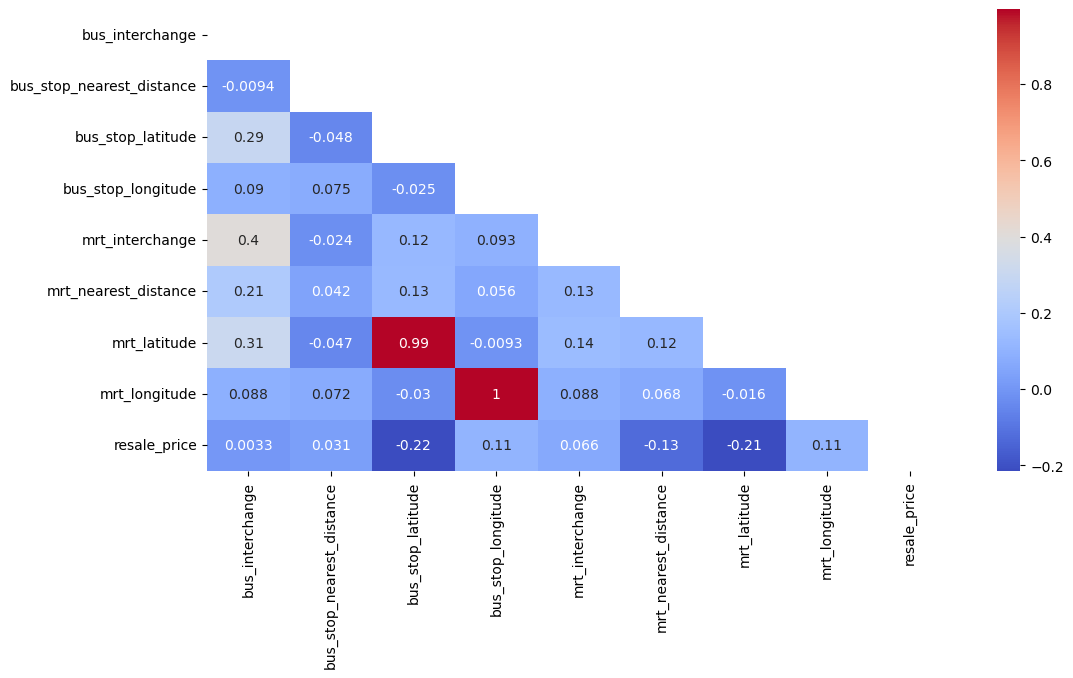

In [63]:
# Establish figure size:
plt.figure(figsize=(12, 6))

# Get correlation of variables:
corr = hdb[feat_pub_transport + target_var].corr(numeric_only=True)

# Set up heatmap mask:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation heatmap for numeric variables:
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


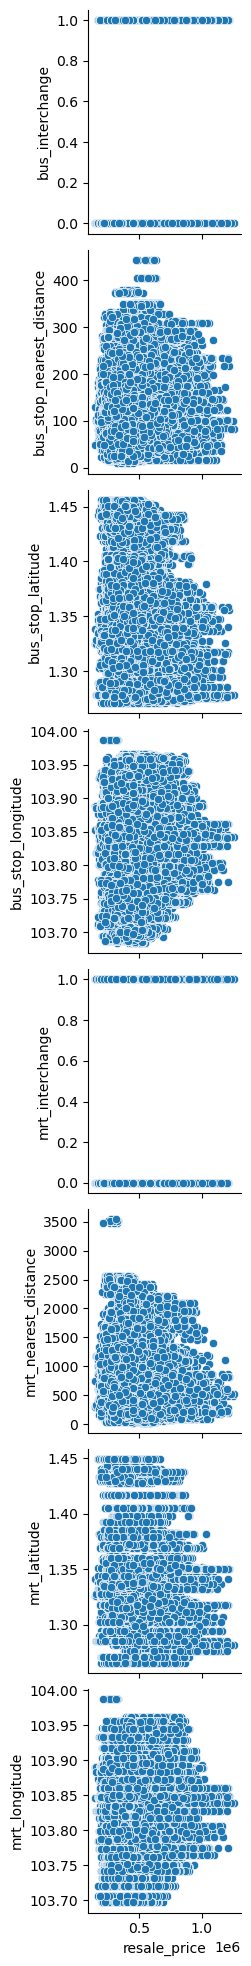

In [64]:
# Plot scatter plot for numeric variables:
sns.pairplot(hdb, x_vars=['resale_price'], y_vars=['bus_interchange',
                                                   'bus_stop_nearest_distance',
                                                   'bus_stop_latitude',
                                                   'bus_stop_longitude',
                                                   'mrt_interchange',
                                                   'mrt_nearest_distance',
                                                   'mrt_latitude',
                                                   'mrt_longitude'])

array([[<Axes: title={'center': 'bus_interchange'}>,
        <Axes: title={'center': 'bus_stop_nearest_distance'}>,
        <Axes: title={'center': 'bus_stop_latitude'}>],
       [<Axes: title={'center': 'bus_stop_longitude'}>,
        <Axes: title={'center': 'mrt_interchange'}>,
        <Axes: title={'center': 'mrt_nearest_distance'}>],
       [<Axes: title={'center': 'mrt_latitude'}>,
        <Axes: title={'center': 'mrt_longitude'}>,
        <Axes: title={'center': 'resale_price'}>]], dtype=object)

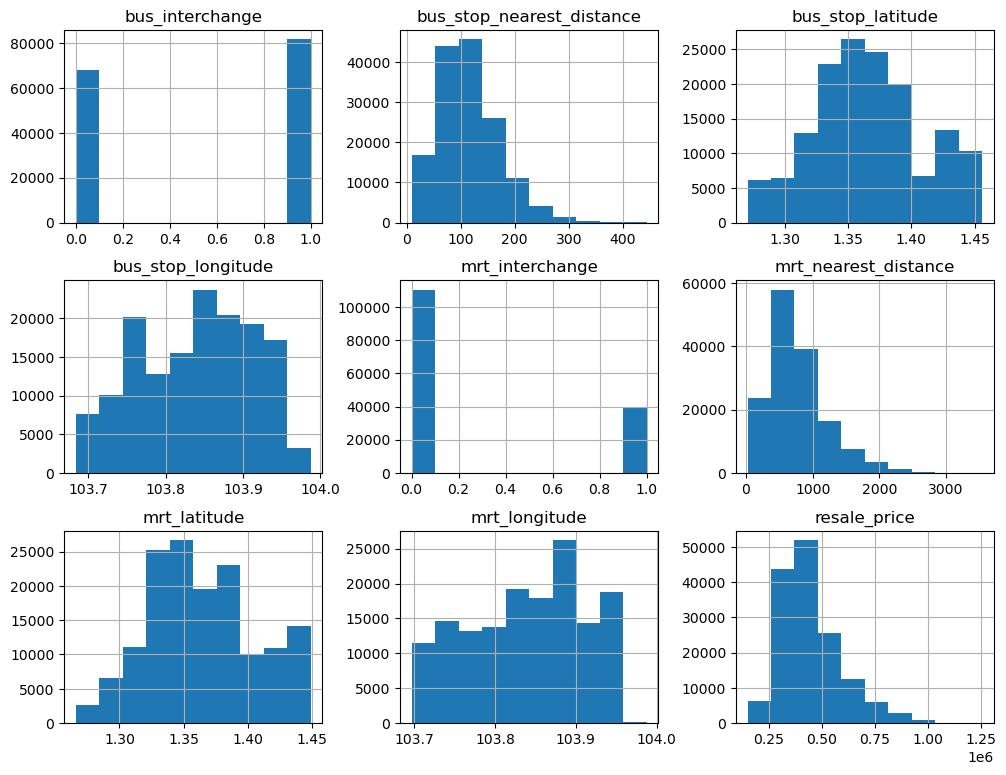

In [65]:
# Plot histogram for numerical features:
hdb[feat_pub_transport + target_var].hist(figsize=(12, 9))

In [66]:
# Check association between features 'bus_stop_name', 'bus_stop_latitude', and 'bus_stop_longitude':

# Count unique values in 'bus_stop_name' feature:
print(hdb['bus_stop_name'].nunique())

# Count unique values in 'bus_stop_latitude' feature:
print(hdb['bus_stop_latitude'].nunique())

# Count unique values in 'bus_stop_longitude' feature:
print(hdb['bus_stop_longitude'].nunique())

# Calculate count ratio of feature 'bus_stop_latitude' to 'bus_stop_name' feature:
2011 / 1657

1637
1990
1990


1.2136391068195533

In [67]:
# Check association between features 'mrt_name', 'mrt_latitude', and 'mrt_longitude':

# Count unique values in 'mrt_name' feature:
print(hdb['mrt_name'].nunique())

# Count unique values in 'mrt_latitude' feature:
print(hdb['mrt_latitude'].nunique())

# Count unique values in 'mrt_longitude' feature:
print(hdb['mrt_longitude'].nunique())

# Calculate count ratio of feature 'mrt_name' to 'mrt_latitude' feature:
94 / 94

94
94
94


1.0

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


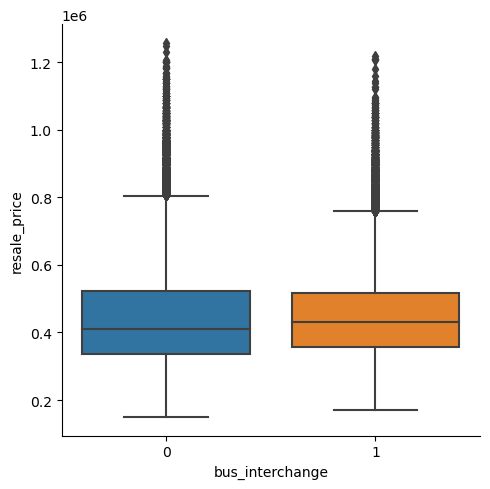

In [68]:
# Plot catplot for 'bus_interchange' feature:
sns.catplot(data=hdb, x='bus_interchange', y='resale_price', kind="box")

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


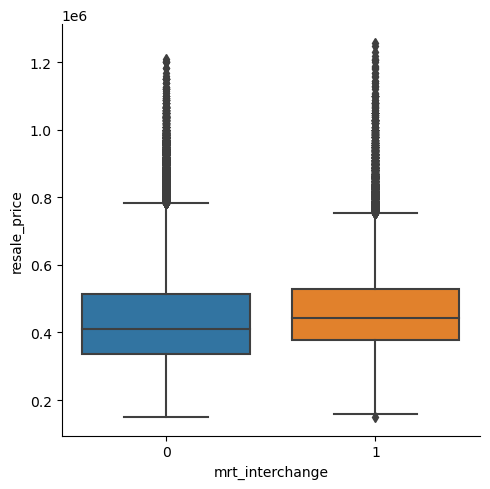

In [69]:
# Plot catplot for 'mrt_interchange' feature:
sns.catplot(data=hdb, x='mrt_interchange', y='resale_price', kind="box")

### 04.05 Observation(s) & Finding(s) (**Public Transport** Features)

<details><summary> Show details: </summary>

> **Numerical Features**
> - Features `bus_stop_latitude` and `mrt_latitude` are almost perfectly correlated (0.99) with each other, which will cause multicollinearity in a linear regression model.
> - Feature `bus_stop_latitude` or `mrt_latitude` should be dropped to prevent multicollinearity.
> - Features `bus_stop_longitude` and `mrt_longitude` are perfectly correlated with each other, which will cause multicollinearity in a linear regression model.
> - Feature `bus_stop_longitude` and `mrt_longitude` should be dropped to prevent multicollinearity.
> - All features do not have a linear relationship with the target variable `resale_price`, with little to no correlation with it.

> **Categorical Features**
> - Features `bus_stop_name`, `bus_stop_latitude`, and `bus_stop_longitude` are highly associated with one another, which will cause multicollinearity in a linear regression model.
> - Feature `bus_stop_latitude` and `bus_stop_longitude` should be dropped to prevent multicollinearity, with feature `bus_stop_name` kept.
> - Features `mrt_name`, `mrt_latitude`, `mrt_longitude` are perfectly associated with one another, which will cause multicollinearity in a linear regression model.
> - Feature `mrt_latitude` and `mrt_longitude` should be dropped to prevent multicollinearity, with feature `mrt_name` kept.
> - These features should be dropped since they have around 90 to 2000 unique values each, which will cause significant overfitting in a linear regression model:
>   - `bus_stop_name`
>   - `bus_stop_latitude`
>   - `bus_stop_longitude`
>   - `mrt_name`
>   - `mrt_latitude`
>   - `mrt_longitude`
> - These features should be taken as categorical variables since they have no linear relationship with the target variable `resale_price`:
>   - `bus_stop_latitude`
>   - `bus_stop_longitude`
>   - `mrt_latitude`
>   - `mrt_longitude`
> - Features `bus_interchange` and `mrt_interchange` show some differences in average effect on the target variable `resale_price` from category to category.


> **Distribution & Outliers**
> - `bus_stop_nearest_distance` is concentrated in the 50-150 range with a right skew with outliers in the 300-450 range, indicating that there are a minority of hdb blocks that are quite far away from a bus stop.
> - `mrt_nearest_distance` is concentrated in the 500-1000 range with a right skew with outliers in the 1700 to 2700 range, which indicates that a minority of hdb blocks are quite far away from an MRT station.

> **Follow-Up Actions**
> 1. **Drop** these features to prevent multicollinearity:
>   - `bus_stop_latitude`
>   - `bus_stop_longitude`
>   - `mrt_latitude`
>   - `mrt_longitude`
> 2. **Drop** these features to prevent significant overfitting:
>   - `bus_stop_name`
>   - `bus_stop_latitude`
>   - `bus_stop_longitude`
>   - `mrt_name`
>   - `mrt_latitude`
>   - `mrt_longitude`
> 2. **Take** these features as categorical variables:
>   - `bus_stop_latitude`
>   - `bus_stop_longitude`
>   - `mrt_latitude`
>   - `mrt_longitude`

</details>

### 04.06 Analyse **Mall & Hawker Centre** Features

In [70]:
# Check data:
hdb[feat_mall_hawker + target_var].head()

mall_nearest_distance  mall_within_500m  mall_within_1km  mall_within_2km  \
0            1094.090418               0.0              0.0              7.0   
1             866.941448               0.0              1.0              3.0   
2            1459.579948               0.0              0.0              4.0   
3             950.175199               0.0              1.0              4.0   
4             729.771895               0.0              1.0              2.0   

   hawker_food_stalls  hawker_market_stalls  hawker_nearest_distance  \
0                  84                    60               154.753357   
1                  80                    77               640.151925   
2                  84                    95              1762.082341   
3                  32                    86               726.215262   
4                  45                     0              1540.151439   

   hawker_within_500m  hawker_within_1km  hawker_within_2km  resale_price  
0                 1.0                3.0               13.0      680000.0  
1                 0.0                1.0                7.0      665000.0  
2                 0.0                0.0                1.0      838000.0  
3                 0.0                1.0                9.0      550000.0  
4                 0.0                0.0                1.0      298000.0

<Axes: >

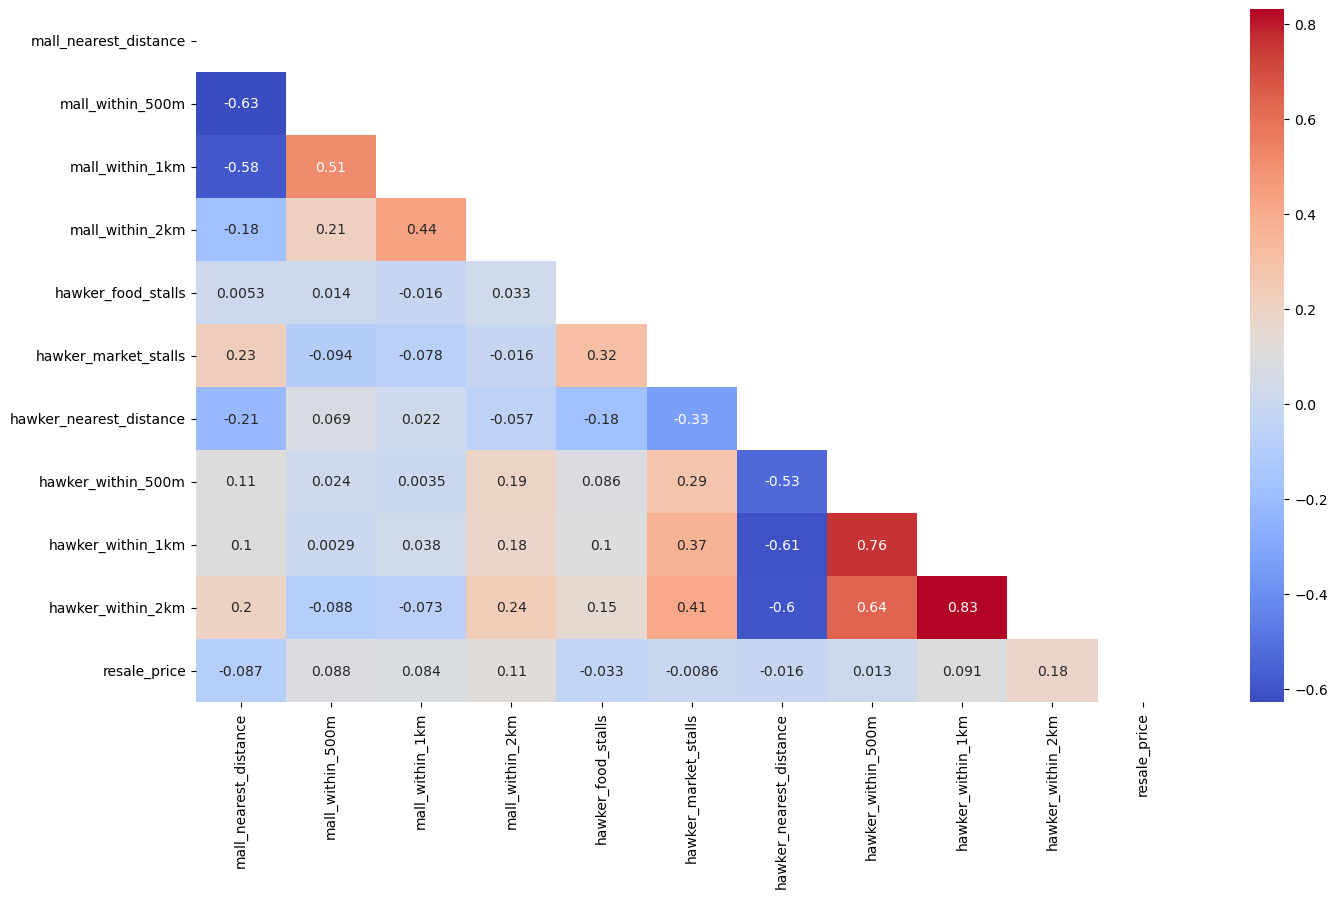

In [71]:
# Establish figure size:
plt.figure(figsize=(16, 9))

# Get correlation of numerical features:
corr = hdb[feat_mall_hawker + target_var].corr(numeric_only=True)

# Set up heatmap mask:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation heatmap for numerical features:
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


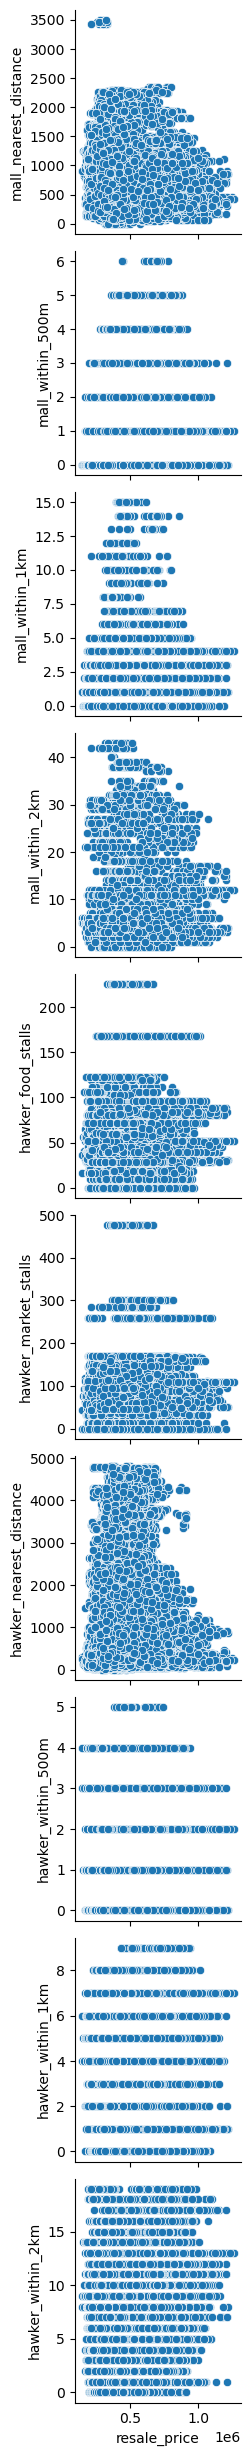

In [72]:
# Plot scatter plot for numeric variables:
sns.pairplot(hdb, x_vars=['resale_price'], y_vars=feat_mall_hawker)

array([[<Axes: title={'center': 'mall_nearest_distance'}>,
        <Axes: title={'center': 'mall_within_500m'}>,
        <Axes: title={'center': 'mall_within_1km'}>],
       [<Axes: title={'center': 'mall_within_2km'}>,
        <Axes: title={'center': 'hawker_food_stalls'}>,
        <Axes: title={'center': 'hawker_market_stalls'}>],
       [<Axes: title={'center': 'hawker_nearest_distance'}>,
        <Axes: title={'center': 'hawker_within_500m'}>,
        <Axes: title={'center': 'hawker_within_1km'}>],
       [<Axes: title={'center': 'hawker_within_2km'}>,
        <Axes: title={'center': 'resale_price'}>, <Axes: >]], dtype=object)

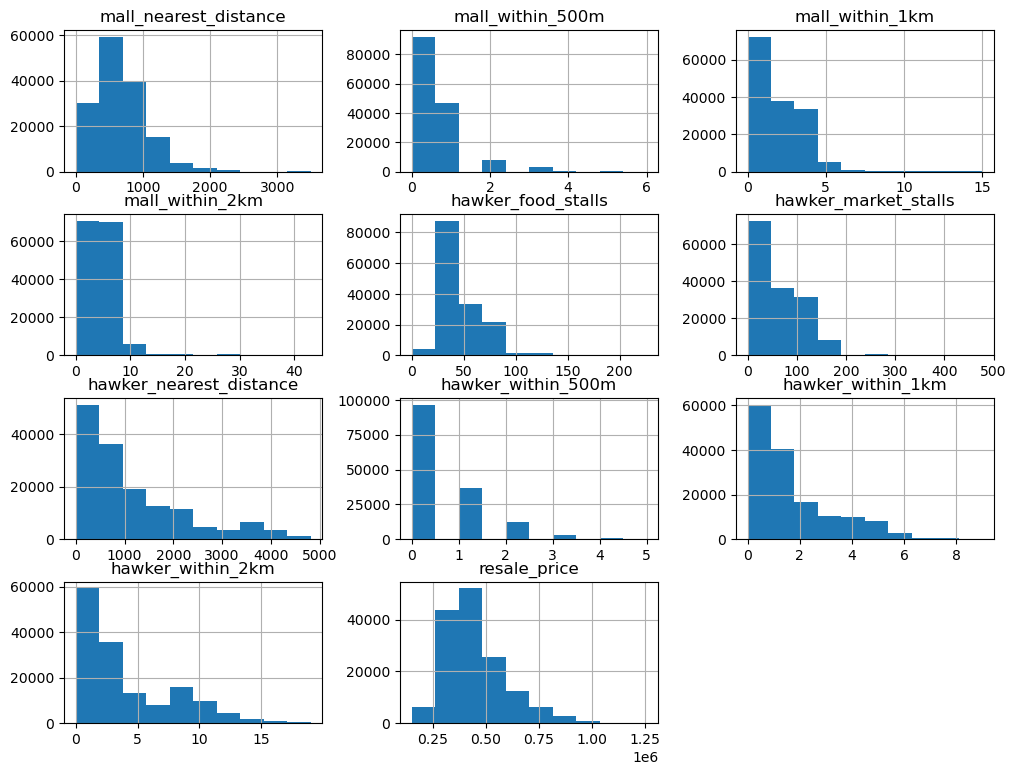

In [73]:
# Plot histogram for numerical features:
hdb[feat_mall_hawker + target_var].hist(figsize=(12, 9))

### 04.06 Observation(s) & Finding(s) (**Mall & Hawker Centre** Features)

<details><summary> Show details: </summary>

> **Numerical Features**
> - Features `mall_within_500m` and `mall_within_1km` are moderately correlated (0.52) with each other.
> - Features `hawker_within_500m` and `hawker_within_1km` are moderately correlated (0.76) with each other.
> - Features `hawker_within_1km` and `hawker_within_2km` are highly correlated (0.83) with each other, which will cause multicollinearity in a linear regression model.
> - Feature `hawker_within_1km` should be dropped to prevent multicollinearity, with feature `hawker_within_2km` kept.
> - All features do not have a linear relationship with the target variable `resale_price`, with little to no correlation with it.

> **Distribution & Outliers**
> - `mall_nearest_distance` and `hawker_nearest_distance` are concentrated in the 0-1000 range, with significant right skew in the 1500-3000 and 2500 to 4500 ranges respectively.

> **Follow-Up Actions**
> 1. **Drop** feature `hawker_within_1km` to prevent multicollinearity.

</details>

### Analyse **School** Features

In [74]:
# Check data:
hdb[feat_sch + target_var].head()

pri_sch_name  vacancy  pri_sch_affiliation  \
0               Geylang Methodist School       78                    1   
1  Kuo Chuan Presbyterian Primary School       45                    1   
2                  Keming Primary School       39                    0   
3                   Catholic High School       20                    1   
4              Naval Base Primary School       74                    0   

   pri_sch_nearest_distance  pri_sch_latitude  pri_sch_longitude  \
0               1138.633422          1.317659         103.882504   
1                415.607357          1.349783         103.854529   
2                498.849039          1.345245         103.756265   
3                389.515528          1.354789         103.844934   
4                401.200584          1.416280         103.838798   

                              sec_sch_name  cutoff_point  affiliation  \
0                 Geylang Methodist School           224            0   
1  Kuo Chuan Presbyterian Secondary School           232            0   
2             Yusof Ishak Secondary School           188            0   
3                     Catholic High School           253            1   
4             Orchid Park Secondary School           208            0   

   sec_sch_nearest_dist  sec_sch_latitude  sec_sch_longitude  resale_price  
0           1138.633422          1.317659         103.882504      680000.0  
1            447.894399          1.350110         103.854892      665000.0  
2            180.074558          1.342334         103.760013      838000.0  
3            389.515528          1.354789         103.844934      550000.0  
4            312.025435          1.414888         103.838335      298000.0

<Axes: >

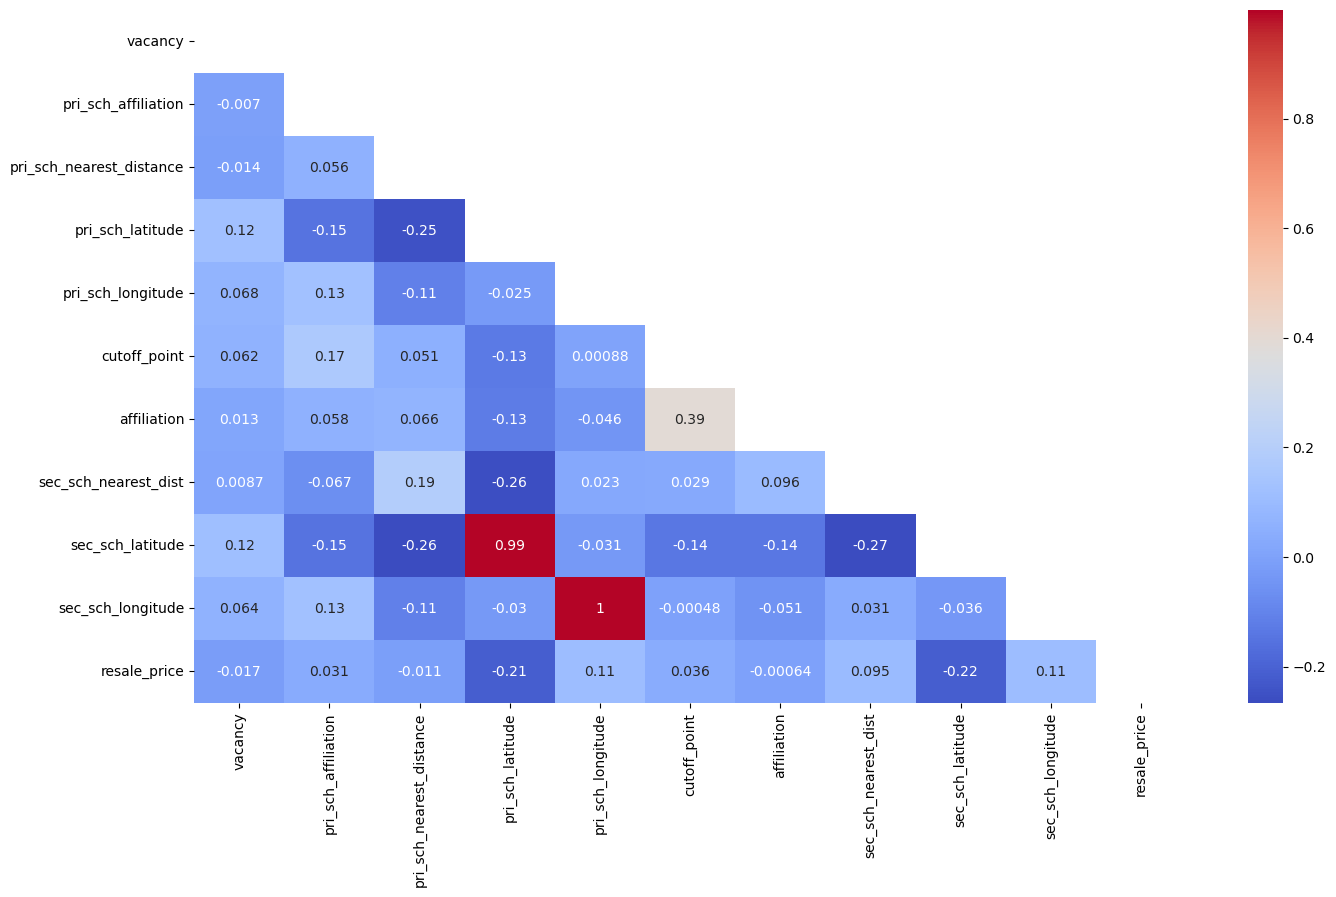

In [75]:
# Establish figure size:
plt.figure(figsize=(16, 9))

# Get correlation of numerical features:
corr = hdb[feat_sch + target_var].corr(numeric_only=True)

# Set up heatmap mask:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation heatmap for numerical features:
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


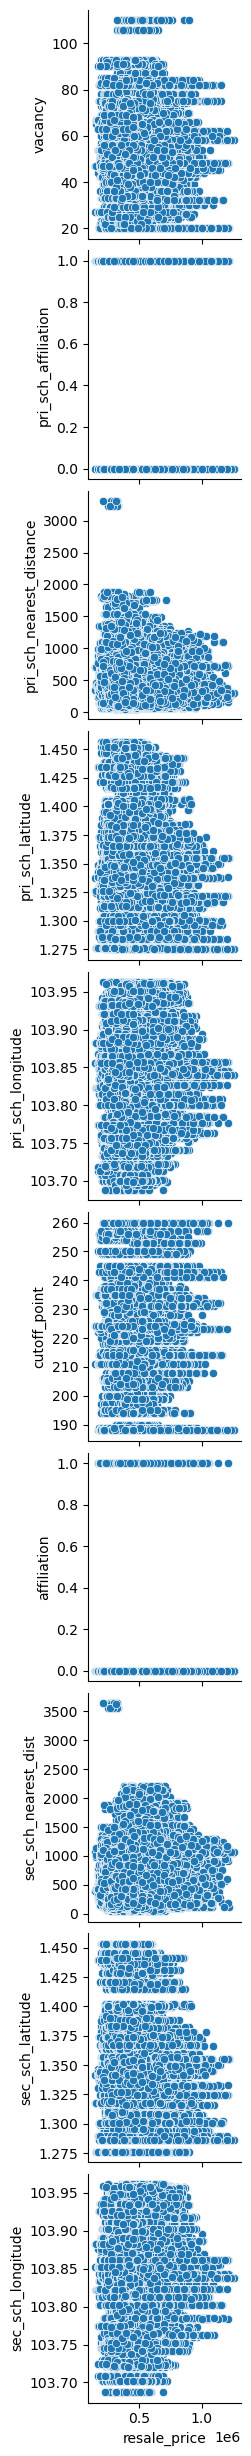

In [76]:
# Plot scatter plot for numerical features:
sns.pairplot(hdb, x_vars=['resale_price'], y_vars=['vacancy',
                                                   'pri_sch_affiliation',
                                                   'pri_sch_nearest_distance',
                                                   'pri_sch_latitude',
                                                   'pri_sch_longitude',
                                                   'cutoff_point',
                                                   'affiliation',
                                                   'sec_sch_nearest_dist',
                                                   'sec_sch_latitude',
                                                   'sec_sch_longitude'])

array([[<Axes: title={'center': 'vacancy'}>,
        <Axes: title={'center': 'pri_sch_affiliation'}>,
        <Axes: title={'center': 'pri_sch_nearest_distance'}>],
       [<Axes: title={'center': 'pri_sch_latitude'}>,
        <Axes: title={'center': 'pri_sch_longitude'}>,
        <Axes: title={'center': 'cutoff_point'}>],
       [<Axes: title={'center': 'affiliation'}>,
        <Axes: title={'center': 'sec_sch_nearest_dist'}>,
        <Axes: title={'center': 'sec_sch_latitude'}>],
       [<Axes: title={'center': 'sec_sch_longitude'}>,
        <Axes: title={'center': 'resale_price'}>, <Axes: >]], dtype=object)

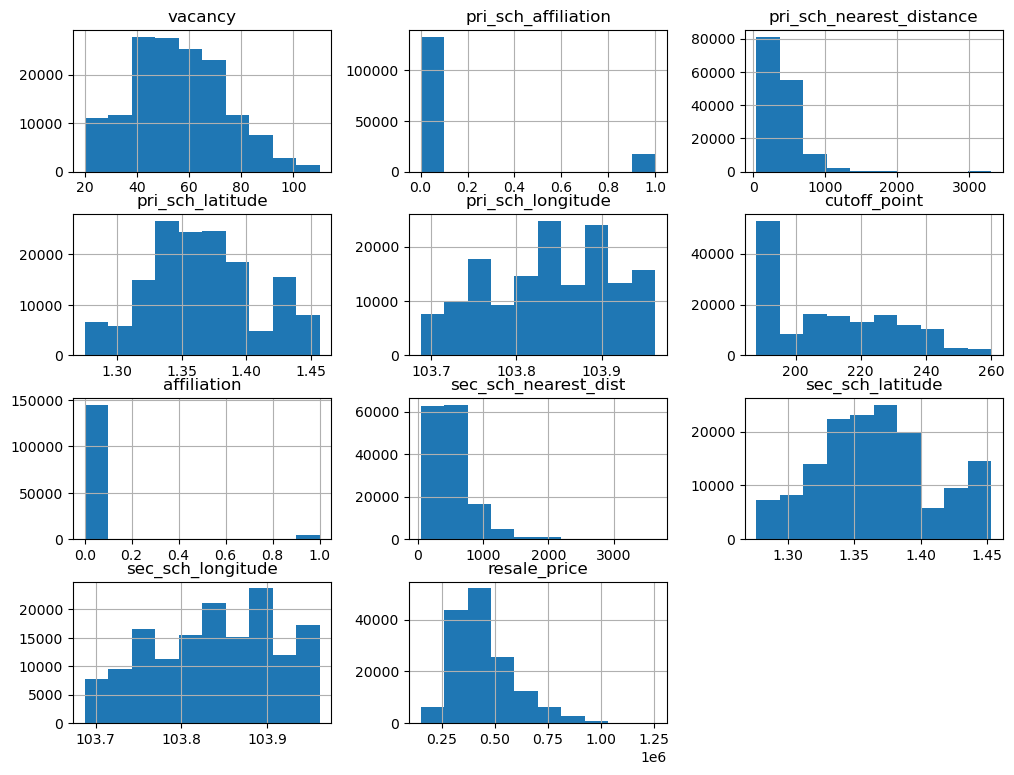

In [77]:
# Plot histogram for numerical features:
hdb[feat_sch + target_var].hist(figsize=(12, 9))

In [78]:
# Check association between features 'pri_sch_name', 'pri_sch_latitude', and 'pri_sch_longitude':

# Count unique values in 'pri_sch_name' feature:
print(hdb['pri_sch_name'].nunique())

# Count unique values in 'pri_sch_latitude' feature:
print(hdb['pri_sch_latitude'].nunique())

# Count unique values in 'pri_sch_longitude' feature:
print(hdb['pri_sch_longitude'].nunique())

# Calculate count ratio of feature 'pri_sch_name to 'pri_sch_latitude' feature:
177 / 177

177
177
177


1.0

In [79]:
# Check association between features 'sec_sch_name', 'sec_sch_latitude', and 'sec_sch_longitude':

# Count unique values in 'sec_sch_name' feature:
print(hdb['sec_sch_name'].nunique())

# Count unique values in 'sec_sch_latitude' feature:
print(hdb['sec_sch_latitude'].nunique())

# Count unique values in 'sec_sch_longitude' feature:
print(hdb['sec_sch_longitude'].nunique())

# Calculate count ratio of feature 'sec_sch_name' to 'sec_sch_latitude' feature:
134 / 134

134
134
134


1.0

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


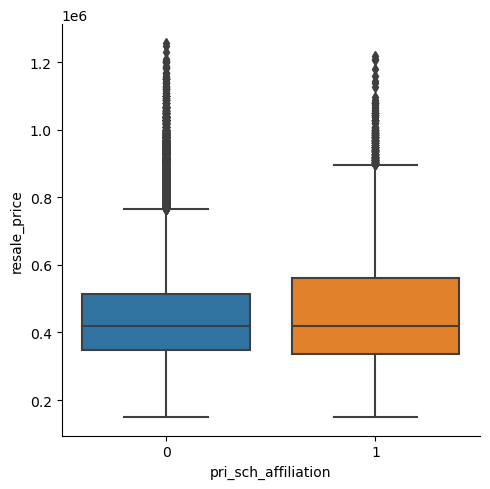

In [80]:
# Plot catplot for 'pri_sch_affiliation' feature:
sns.catplot(data=hdb, x='pri_sch_affiliation', y='resale_price', kind="box")

/Users/lionel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


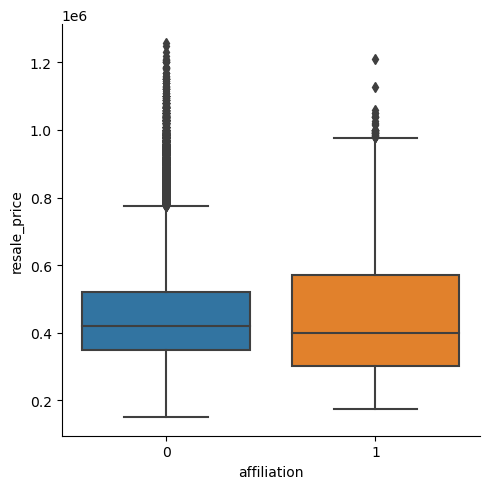

In [81]:
# Plot catplot for 'affiliation' feature:
sns.catplot(data=hdb, x='affiliation', y='resale_price', kind="box")

In [82]:
# Check data:
hdb[feat_sch + target_var].head()

pri_sch_name  vacancy  pri_sch_affiliation  \
0               Geylang Methodist School       78                    1   
1  Kuo Chuan Presbyterian Primary School       45                    1   
2                  Keming Primary School       39                    0   
3                   Catholic High School       20                    1   
4              Naval Base Primary School       74                    0   

   pri_sch_nearest_distance  pri_sch_latitude  pri_sch_longitude  \
0               1138.633422          1.317659         103.882504   
1                415.607357          1.349783         103.854529   
2                498.849039          1.345245         103.756265   
3                389.515528          1.354789         103.844934   
4                401.200584          1.416280         103.838798   

                              sec_sch_name  cutoff_point  affiliation  \
0                 Geylang Methodist School           224            0   
1  Kuo Chuan Presbyterian Secondary School           232            0   
2             Yusof Ishak Secondary School           188            0   
3                     Catholic High School           253            1   
4             Orchid Park Secondary School           208            0   

   sec_sch_nearest_dist  sec_sch_latitude  sec_sch_longitude  resale_price  
0           1138.633422          1.317659         103.882504      680000.0  
1            447.894399          1.350110         103.854892      665000.0  
2            180.074558          1.342334         103.760013      838000.0  
3            389.515528          1.354789         103.844934      550000.0  
4            312.025435          1.414888         103.838335      298000.0

In [83]:
# Check distribution of categories in feature 'affiliation' by 'planning_area':
print(hdb[hdb['affiliation'] == 0]['id'].groupby(hdb['planning_area']).count())
print('\n')
print(hdb[hdb['affiliation'] == 1]['id'].groupby(hdb['planning_area']).count())

# Calculate proportion of category 0 in feature 'multistorey_carpark':
print('\n')
print(hdb[hdb['multistorey_carpark'] == 1]['id'].count() / hdb['id'].count())

planning_area
Ang Mo Kio                  6474
Bedok                       8166
Bishan                      2285
Bukit Batok                 5700
Bukit Merah                 5834
Bukit Panjang               5664
Bukit Timah                  148
Changi                        38
Choa Chu Kang               6201
Clementi                    3628
Geylang                     3951
Hougang                     7539
Jurong East                 3431
Jurong West                 9985
Kallang                     2691
Marine Parade                943
Novena                      1090
Outram                       759
Pasir Ris                   4708
Punggol                     7614
Queenstown                  4044
Sembawang                   3723
Sengkang                   10894
Serangoon                   3121
Tampines                   10463
Tanglin                       25
Toa Payoh                   4551
Western Water Catchment       15
Woodlands                  11299
Yishun                     10

### 04.07 Observation(s) & Finding(s) (**School** Features)

<details><summary> Show details: </summary>

> **Numerical Features**
> - Features `pri_sch_latitude` and `pri_sch_longitude` are perfectly correlated (1.0) with each other, which will cause multicollinearity in a linear regression model.
> - Feature `pri_sch_latitude` or `pri_sch_longitude` should be dropped to prevent multicollinearity.
> - Features `pri_sch_latitude` and `pri_sch_longitude` are almost perfectly correlated (0.99) with each other, which will cause multicollinearity in a linear regression model.
> - Feature `pri_sch_latitude` or `pri_sch_longitude` should be dropped to prevent multicollinearity.
> - All features do not have a linear relationship with the target variable `resale_price`, with little to no correlation with it.

> **Categorical Features**
> - Features `pri_sch_name`, `pri_sch_latitude`, and `pri_sch_longitude` are perfectly associated with one another, which will cause multicollinearity in a linear regression model.
> - Feature `pri_sch_latitude` and `pri_sch_longitude` should be dropped to prevent multicollinearity, with feature `pri_sch_name` kept.
> - Features `sec_sch_name`, `sec_sch_latitude`, and `sec_sch_longitude` are perfectly associated with one another, which will cause multicollinearity in a linear regression model.
> - Feature `sec_sch_latitude` and `sec_sch_longitude` should be dropped to prevent multicollinearity, with feature `sec_sch_name` kept.
> - These features should be dropped since they have around 130 to 170 unique values each, which will cause significant overfitting in a linear regression model:
>   - `pri_sch_name`
>   - `pri_sch_latitude`
>   - `pri_sch_longitude`
>   - `sec_sch_name`
>   - `sec_sch_latitude`
>   - `sec_sch_longitude`
> - These features should be taken as categorical variables since they have no linear relationship with the target variable `resale_price`:
>   - `pri_sch_latitude`
>   - `pri_sch_longitude`
>   - `sec_sch_latitude`
>   - `sec_sch_longitude`
> - Features `pri_sch_affiliation` and `affiliation` show minimal differences in average effect on the target variable `resale_price` from category to category.

> **Distribution & Outliers**
> - `pri_sch_nearest_distance` and `sec_sch_nearest_distance` 0-750, with significant right skew indicating outliers from the range of 1000 onwards.

> **Follow-Up Actions**
> 1. **Drop** these features to prevent multicollinearity:
>   - `pri_sch_latitude`
>   - `pri_sch_longitude`
>   - `sec_sch_latitude`
>   - `sec_sch_longitude`
> 2. **Drop** these features to prevent significant overfitting:
>   - `pri_sch_name`
>   - `pri_sch_latitude`
>   - `pri_sch_longitude`
>   - `sec_sch_name`
>   - `sec_sch_latitude`
>   - `sec_sch_longitude`
> 2. **Take** these features as categorical variables:
>   - `pri_sch_latitude`
>   - `pri_sch_longitude`
>   - `sec_sch_latitude`
>   - `sec_sch_longitude`

</details>

## 05. Clean Data

### 05.01 Updated Data Dictionary with Follow-Up Actions

<details><summary> Show details: </summary>

> | **No.** | **Column** | **Description** | **Type** | **Feature Group** | **Variable Type** | **Redundant** | **Collinear** | **Many Dummies** (~ >100) | **Drop Feature** |
> |---|---|---|---|---|---|---|---|---|---|
> | 1 | `id` | Index number | Index | - | Categorical | - | - | - | - |
> | 2 | `resale_price` | Property's sale price in Singapore dollars. | Target Variable | - | Numerical | - | - | - | - |
> | 3 | `Tranc_year` | Year of resale transaction. | Feature | Transaction | Categorical | | | | |
> | 4 | `Tranc_month` | Month of resale transaction. | Feature | Transaction | Categorical | | | | |
> | 5 | `Tranc_yearmonth` | Year and month of the resale transaction. | Feature | Transaction | Categorical | | | | |
> | 6 | `year_completed` | Year which construction was completed for resale flat. | Feature | Transaction | Numerical | | Y | - | Y |
> | 7 | `lease_commence_date` | Commencement year of the flat unit's 99-year lease. | Feature | Transaction | Numerical | | Y | - | Y |
> | 8 | `hdb_age` | Number of years from lease_commence_date to 2021. | Feature | Transaction | Numerical | | Y | - | |
> | 9 | `planning_area` | Government planning area that the flat is located. | Feature | Location | Categorical | | Y | | |
> | 10 | `town` | HDB township where the flat is located. | Feature | Location | Categorical | | Y | | Y |
> | 11 | `street_name` | Street name where the resale flat resides. | Feature | Location | Categorical | | Y | Y | Y |
> | 12 | `block` | Block number of the resale flat. | Feature | Location | Categorical | | ? | Y | Y |
> | 13 | `address` | Combination of `block` and `street_name`. | Feature | Location | Categorical | | Y | Y | Y |
> | 14 | `postal` | Postal code of the resale flat block. | Feature | Location | Categorical | | Y | Y | Y |
> | 15 | `Latitude` | Latitude based on postal code. | Feature | Location | Categorical | | Y | Y | Y |
> | 16 | `Longitude` | Longitude based on postal code. | Feature | Location | Categorical | | Y | Y | Y |
> | 17 | `residential` | Boolean value if resale flat has residential units in the same block. | Feature | Block | Categorical | Y | | | Y |
> | 18 | `commercial` | Boolean value if resale flat has commercial units in the same block. | Feature | Block | Categorical | | | | |
> | 19 | `market_hawker` | Boolean value if resale flat has a market or hawker centre in the same block. | Feature | Block | Categorical | | | | |
> | 20 | `multistorey_carpark` | Boolean value if resale flat has a multistorey carpark in the same block. | Feature | Block | Categorical | | | | |
> | 21 | `precinct_pavilion` | Boolean value if resale flat has a pavilion in the same block. | Feature | Block | Categorical | | | | |
> | 22 | `max_floor_lvl` | Highest floor of the resale flat. | Feature | Block | Numerical | | | - | |
> | 23 | `total_dwelling_units` | Total number of residential dwelling units in the resale flat. | Feature | Block | Numerical | | | - | |
> | 24 | `1room_sold` | Number of 1-room residential units in the resale flat. | Feature | Block | Numerical | | | - | |
> | 25 | `2room_sold` | Number of 2-room residential units in the resale flat. | Feature | Block | Numerical | | | - | |
> | 26 | `3room_sold` | Number of 3-room residential units in the resale flat. | Feature | Block | Numerical | | | - | |
> | 27 | `4room_sold` | Number of 4-room residential units in the resale flat. | Feature | Block | Numerical | | | - | |
> | 28 | `5room_sold` | Number of 5-room residential units in the resale flat. | Feature | Block | Numerical | | | - | |
> | 29 | `exec_sold` | Number of executive type residential units in the resale flat block. | Feature | Block | Numerical | | | - | |
> | 30 | `multigen_sold` | Number of multi-generational type residential units in the resale flat block. | Feature | Block | Numerical | | | - | |
> | 31 | `studio_apartment_sold` | Number of studio apartment type residential units in the resale flat block. | Feature | Block | Numerical | | | - | |
> | 32 | `1room_rental` | Number of 1-room rental residential units in the resale flat block. | Feature | Block | Numerical | | | - | |
> | 33 | `2room_rental` | Number of 2-room rental residential units in the resale flat block. | Feature | Block | Numerical | | | - | |
> | 34 | `3room_rental` | Number of 3-room rental residential units in the resale flat block. | Feature | Block | Numerical | | | - | |
> | 35 | `other_room_rental` | Number of "other" type rental residential units in the resale flat block. | Feature | Block | Numerical | | | - | |
> | 36 | `flat_type` | Type of the resale flat unit. | Feature | Flat | Categorical | | | | |
> | 37 | `flat_model` | HDB model of the resale flat, e.g. Multi Generation. | Feature | Flat | Categorical | | | | |
> | 38 | `full_flat_type` | Combination of `flat_type` and `flat_model`. | Feature | Flat | Categorical | | | | |
> | 39 | `storey_range` | Floor level (range) of the resale flat unit. | Feature | Flat | Categorical | | Y | | Y |
> | 40 | `lower` | Lower value of `storey_range`. | Feature | Flat | Numerical | | Y | - | Y |
> | 41 | `mid` | Middle value of `storey_range`. | Feature | Flat | Numerical | Y | Y | - | Y |
> | 42 | `upper` | Upper value of `storey_range`. | Feature | Flat | Numerical | | Y | - | Y |
> | 43 | `mid_storey` | Median value of `storey_range`. | Feature | Flat | Numerical | Y | Y | - | |
> | 44 | `floor_area_sqm` | Floor area of the resale flat unit in square metres. | Feature | Flat | Numerical | | Y | - | Y |
> | 45 | `floor_area_sqft` | Floor area of the resale flat unit in square feet. | Feature | Flat | Numerical | | Y | - | |
> | 46 | `bus_stop_name` | Name of the nearest bus stop. | Feature | Public Transport | Categorical | | Y | Y | Y |
> | 47 | `bus_interchange` | Boolean value if the nearest MRT station is also a bus interchange. | Feature | Public Transport | Categorical | | | | |
> | 48 | `bus_stop_nearest_distance` |  Distance (in metres) to the nearest bus stop. | Feature | Public Transport | Numerical | | | - | |
> | 49 | `bus_stop_latitude` | Latitude (in decimal degrees) of the the nearest bus stop. | Feature | Public Transport | Categorical | | Y | Y | Y |
> | 50 | `bus_stop_longitude` | Longitude (in decimal degrees) of the nearest bus stop. | Feature | Public Transport | Categorical | | Y | Y | Y |
> | 51 | `mrt_name` | Name of the nearest MRT station. | Feature | Public Transport | Categorical | | Y | Y | Y |
> | 52 | `mrt_interchange` | Boolean value if the nearest MRT station is a train interchange station. | Feature | Public Transport | Categorical | | | | |
> | 53 | `mrt_nearest_distance`| Distance (in metres) to the nearest MRT station. | Feature | Public Transport | Numerical | | | - | |
> | 54 | `mrt_latitude` | Latitude (in decimal degrees) of the the nearest MRT station. | Feature | Public Transport | Categorical | | Y | Y | Y |
> | 55 | `mrt_longitude` | Longitude (in decimal degrees) of the nearest MRT station. | Feature | Public Transport | Categorical | | Y | Y | Y |
> | 56 | `mall_nearest_distance.` | Distance (in metres) to the nearest mall. | Feature | Mall | Numerical | | | - | |
> | 57 | `mall_within_500m` | Number of malls within 500 metres. | Feature | Mall | Numerical | | | - | |
> | 58 | `mall_within_1km` | Number of malls within 1 kilometre. | Feature | Mall | Numerical | | | - | |
> | 59 | `mall_within_2km` | Number of malls within 2 kilometres. | Feature | Mall | Numerical | | | - | |
> | 60 | `hawker_food_stalls` | Number of hawker food stalls in the nearest hawker centre. | Feature | Hawker Centre | Numerical | | | - | |
> | 61 | `hawker_market_stalls` | Number of hawker and market stalls in the nearest hawker centre. | Feature | Hawker Centre | Numerical | | | - | |
> | 62 | `hawker_nearest_distance` | Distance (in metres) to the nearest hawker centre. | Feature | Hawker Centre | Numerical | | | - | |
> | 63 | `hawker_within_500m` | Number of hawker centres within 500 metres. | Feature | Hawker Centre | Numerical | | | - | |
> | 64 | `hawker_within_1km` | Number of hawker centres within 1 kilometre. | Feature | Hawker Centre | Numerical | | Y | - | Y |
> | 65 | `hawker_within_2km` | Number of hawker centres within 2 kilometres. | Feature | Hawker Centre | Numerical | | Y | - | |
> | 66 | `pri_sch_name` | Name of the nearest primary school. | Feature | School | Categorical | | Y | Y | Y |
> | 67 | `vacancy` | Number of vacancies in the nearest primary school. | Feature | School | Numerical | | | - | |
> | 68 | `pri_sch_affiliation` | Boolean value if the nearest primary school has a secondary school affiliation. | Feature | School | Categorical | | | | |
> | 69 | `pri_sch_nearest_distance` | Distance (in metres) to the nearest primary school. | Feature | School | Numerical | | | - | |
> | 70 | `pri_sch_latitude` | Latitude (in decimal degrees) of the the nearest primary school. | Feature | School | Categorical | | Y | Y | Y |
> | 71 | `pri_sch_longitude` | Longitude (in decimal degrees) of the nearest primary school. | Feature | School | Categorical | | Y | Y | Y |
> | 72 | `sec_sch_name` | Name of the nearest secondary school. | Feature | School | Categorical | | Y | Y | Y |
> | 73 | `cutoff_point` | PSLE cutoff point of the nearest secondary school. | Feature | School | Numerical | | | - | |
> | 74 | `affiliation` | Boolean value if the nearest secondary school has a primary school affiliation. | Feature | School | Categorical | | | | |
> | 75 | `sec_sch_nearest_dist` | Distance (in metres) to the nearest secondary school. | Feature | School | Numerical | | | - | |
> | 76 | `sec_sch_latitude` | Latitude (in decimal degrees) of the the nearest secondary school. | Feature | School | Categorical | | Y | Y | Y |
> | 77 | `sec_sch_longitude` | Longitude (in decimal degrees) of the nearest secondary school . | Feature | School | Categorical | | Y | Y | Y |

</details>

### 05.02 Drop Relevant Columns

In [84]:
# Drop relevant column(s) from transaction & location features list 'feat_txn_loc':
feat_txn_loc.remove('year_completed')
feat_txn_loc.remove('lease_commence_date')
feat_txn_loc.remove('town')
feat_txn_loc.remove('street_name')
feat_txn_loc.remove('block')
feat_txn_loc.remove('address')
feat_txn_loc.remove('postal')
feat_txn_loc.remove('latitude')
feat_txn_loc.remove('longitude')

In [85]:
# Drop relevant column(s) from block features list 'feat_block':
feat_block.remove('residential')

In [86]:
# Drop relevant column(s) from flat features list 'feat_flat':
feat_flat.remove('storey_range')
feat_flat.remove('lower')
feat_flat.remove('mid')
feat_flat.remove('upper')
feat_flat.remove('floor_area_sqm')

In [87]:
# Drop relevant column(s) from public transport features list 'feat_pub_transport':
feat_pub_transport.remove('bus_stop_name')
feat_pub_transport.remove('bus_stop_latitude')
feat_pub_transport.remove('bus_stop_longitude')
feat_pub_transport.remove('mrt_name')
feat_pub_transport.remove('mrt_latitude')
feat_pub_transport.remove('mrt_longitude')

In [88]:
# Drop relevant column(s) from mall & hawker centre features list 'feat_mall_hawker':
feat_mall_hawker.remove('hawker_within_1km')

In [89]:
# Drop relevant column(s) from school features list 'feat_sch':
feat_sch.remove('pri_sch_name')
feat_sch.remove('pri_sch_latitude')
feat_sch.remove('pri_sch_longitude')
feat_sch.remove('sec_sch_name')
feat_sch.remove('sec_sch_latitude')
feat_sch.remove('sec_sch_longitude')

In [90]:
# Count total columns to keep:
len(feat_txn_loc + feat_block + feat_flat + feat_pub_transport + feat_mall_hawker + feat_sch + target_var)

48

In [91]:
# Define output data:
hdb_1 = hdb[feat_txn_loc + feat_block + feat_flat + feat_pub_transport + feat_mall_hawker + feat_sch + target_var]

# Reset index:
hdb_1.reset_index(drop=True, inplace=True)

In [92]:
# Check output data:
print(hdb_1.shape)
hdb_1.head()

(149805, 48)


tranc_year  tranc_month tranc_yearmonth  hdb_age planning_area  commercial  \
0        2016            5         2016-05       10       Kallang           0   
1        2012            7         2012-07       25        Bishan           0   
2        2013            7         2013-07       16   Bukit Batok           0   
3        2012            4         2012-04       20        Bishan           1   
4        2017           12         2017-12       30        Yishun           0   

   market_hawker  multistorey_carpark  precinct_pavilion  max_floor_lvl  \
0              0                    0                  0             25   
1              0                    0                  0              9   
2              0                    0                  0             16   
3              0                    0                  0             11   
4              0                    0                  0              4   

   total_dwelling_units  1room_sold  2room_sold  3room_sold  4room_sold  \
0                   142           0           0           0          96   
1                   112           0           0           0          56   
2                    90           0           0           0           0   
3                    75           0           0           0          68   
4                    48           0           0           0          30   

   5room_sold  exec_sold  multigen_sold  studio_apartment_sold  1room_rental  \
0          46          0              0                      0             0   
1          56          0              0                      0             0   
2          30         60              0                      0             0   
3           7          0              0                      0             0   
4          18          0              0                      0             0   

   2room_rental  3room_rental  other_room_rental  flat_type  flat_model  \
0             0             0                  0     4 ROOM     Model A   
1             0             0                  0     5 ROOM    Improved   
2             0             0                  0  EXECUTIVE   Apartment   
3             0             0                  0     4 ROOM     Model A   
4             0             0                  0     4 ROOM  Simplified   

        full_flat_type  mid_storey  floor_area_sqft  bus_interchange  \
0       4 ROOM Model A          11          968.760                0   
1      5 ROOM Improved           8         1399.320                1   
2  EXECUTIVE Apartment          14         1550.016                1   
3       4 ROOM Model A           3         1108.692                1   
4    4 ROOM Simplified           2          893.412                0   

   bus_stop_nearest_distance  mrt_interchange  mrt_nearest_distance  \
0                  29.427395                0            330.083069   
1                  58.207761                1            903.659703   
2                 214.747860                0           1334.251197   
3                  43.396521                1            907.453484   
4                 129.422752                0            412.343032   

   mall_nearest_distance  mall_within_500m  mall_within_1km  mall_within_2km  \
0            1094.090418               0.0              0.0              7.0   
1             866.941448               0.0              1.0              3.0   
2            1459.579948               0.0              0.0              4.0   
3             950.175199               0.0              1.0              4.0   
4             729.771895               0.0              1.0              2.0   

   hawker_food_stalls  hawker_market_stalls  hawker_nearest_distance  \
0                  84                    60               154.753357   
1                  80                    77               640.151925   
2                  84                    95              1762.082341   
3                  32                    86          

<Axes: >

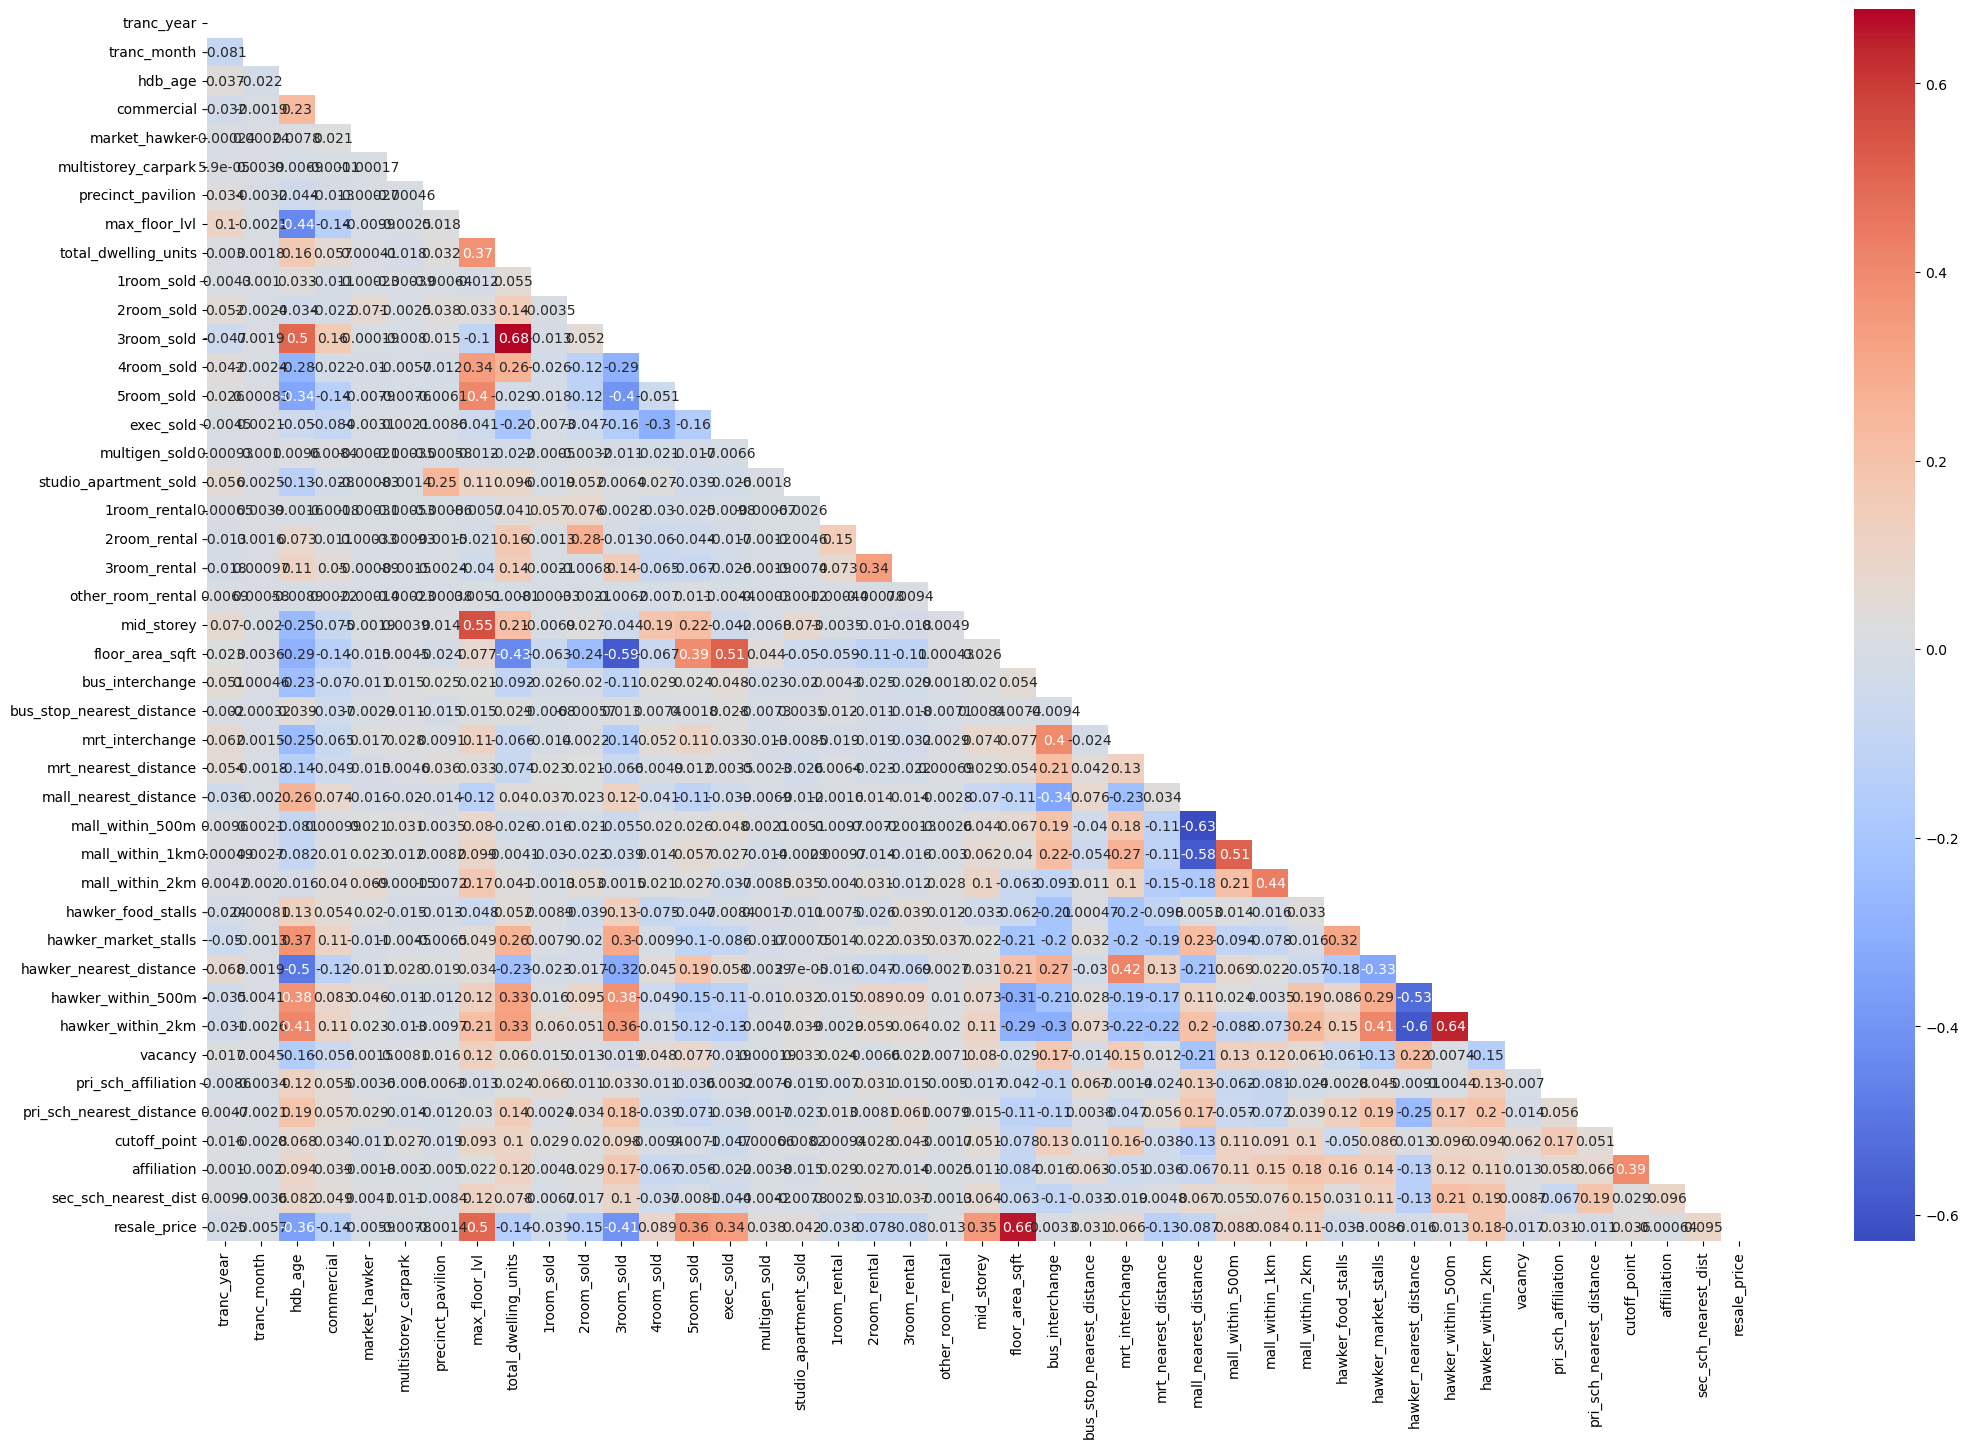

In [93]:
# Establish figure size:
plt.figure(figsize=(25, 16))

# Get correlation of numerical features:
corr = hdb_1.corr(numeric_only=True)

# Set up heatmap mask:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation heatmap for numerical features:
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)

In [94]:
# Import library:
import os  # to work with files/directories

# Define the output folder path:
output_folder_path = '../project_2/output'

# Check if the output folder exists, and create it if not:
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Save CSV file within the 'output' folder:
hdb_1.to_csv(os.path.join(output_folder_path, 'hdb_train_new.csv'))